# **DATA UNDERSTANDING**

## Collect Initial Data

In [501]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import seaborn as sns
#plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-pastel')
plt.style.use('seaborn-muted')
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
%%HTML
<style type="text/css">
# table.dataframe td, table.dataframe th {
#     border: 1px  black solid !important;
#   color: black !important;
# }
</style>

In [3]:
df_baseline = pd.read_csv('./data_new/new_ojol_baseline_new.txt', sep='|')
df_usage = pd.read_csv('./data_new/new_ojol_usage.txt', sep='|')
df_bcp = pd.read_csv('./data_new/new_ojol_bcp.txt', sep='|')
df_recharge = pd.read_csv('./data_new/new_ojol_recharge.txt', sep='|')
df_mytelkomsel = pd.read_csv('./data_new/new_ojol_mytsel.txt', sep='|')

## Describe Data

Check data dimension

In [4]:
print('Size of df_baseline      : ',df_baseline.shape)
print('Size of df_usage         : ',df_usage.shape)
print('Size of df_bcp           : ',df_bcp.shape)
print('Size of df_recharge      : ',df_recharge.shape)
print('Size of df_mytelkomsel   : ',df_mytelkomsel.shape)

Size of df_baseline      :  (1895124, 3)
Size of df_usage         :  (1895125, 26)
Size of df_bcp           :  (1895125, 2)
Size of df_recharge      :  (1895125, 2)
Size of df_mytelkomsel   :  (588002, 2)


Create function to show and plot data profile

In [15]:
# Show Data Profile
def show_data_profile(df):
    Data_dict = pd.DataFrame(df.dtypes)
    Data_dict = Data_dict.rename(columns={0: 'Data_Type'})
    Data_dict['Missing_Value'] = df.isnull().sum()
    Data_dict['Missing_Val_Pct'] = round((df.isnull().sum()/df.count())*100, 2)
    Data_dict['Unique_Value'] = df.nunique()
    Data_dict['Count'] = df.count()
    return Data_dict.sort_values(by=['Missing_Val_Pct', 'Unique_Value'], ascending=[False, True])

In [16]:
def plot_data_profile(df, cols):
    #cols = df.columns
    #plt.figure(figsize = (8,8))
    for counter, col in enumerate(cols):
        plt.figure(figsize=(10, 4))
        # plt.subplot(len(cols),1,counter+1)
        orient = 'v'
        not_dist_plot = True
        num_level = df[col].nunique()

        if (num_level <= 15):
            ax = sns.countplot(
                y=col, data=df, order=df[col].value_counts().index)
            orient = 'h'
        elif (num_level >= 15 and num_level < 30):
            ax = sns.countplot(
                x=col, data=df, order=df[col].value_counts().index)
        elif (num_level >= 30):
            if df[col].dtypes != 'O':
                ax = sns.distplot(df[col].dropna(), kde=True)
                not_dist_plot = False
            else:
                ax = sns.countplot(
                    x=col, data=df, order=df[col].value_counts().index)
        # plt.title(col)

        # Create anotation
        if orient == 'h':
            total = len(df[col])
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/total)
                x = p.get_x() + p.get_width() + 0.02
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y))
        elif (orient == 'v' and not_dist_plot):
            total = len(df[col])
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height()/total)
                x = p.get_x() + (p.get_width()/8)
                y = p.get_height() + 2
                ax.annotate(percentage, (x, y))
        plt.show()
        # plt.tight_layout()
        display(df[col].describe().to_frame().T)
        print("")
        print("")

### Ojol Baseline

In [7]:
df_baseline.head(5)

,msisdn,flag_taker,los
0,628111006169,0,965.0
1,628111042616,0,NaN
2,628111404401,0,859.0
3,628111593362,0,NaN
4,628111618118,0,1259.0


In [8]:
# #Delete first row
# indexNames = df_baseline[ (df_baseline['msisdn'] == 'dsa_ojol_baseline.msisdn')].index
# df_baseline.drop(indexNames , inplace=True)
# print('Shape df_baseline         : ',df_baseline.shape)

In [9]:
df_baseline.fillna(0,inplace=True)

In [10]:
show_data_profile(df_baseline)

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
flag_taker,int64,0,0.0,2,1895124
los,float64,0,0.0,5678,1895124
msisdn,object,0,0.0,1895124,1895124


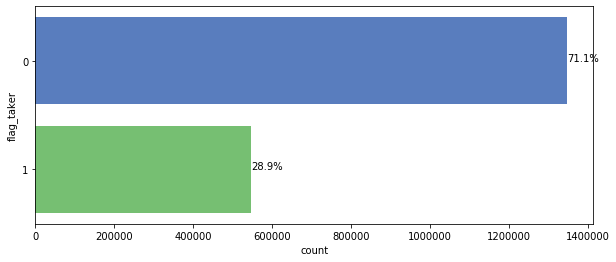

,count,mean,std,min,25%,50%,75%,max
flag_taker,1895124.0,0.288857,0.453231,0.0,0.0,0.0,1.0,1.0


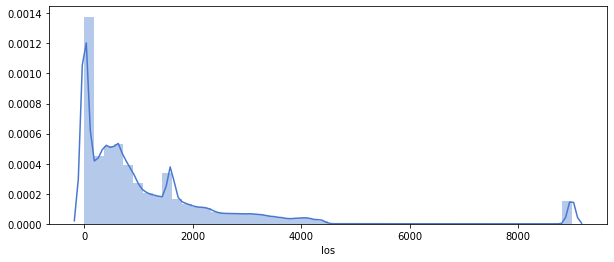

,count,mean,std,min,25%,50%,75%,max
los,1895124.0,1206.577159,1661.649887,0.0,185.0,678.0,1598.0,8985.0


In [11]:
plot_data_profile(df_baseline,['flag_taker','los'])

### Ojol Usage

In [12]:
df_usage.head(5)

,msisdn,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,...,mou_voice,mou_voice_onnet,mou_voice_offnet,trx_sms,trx_sms_onnet,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region
0,dsa_ojol_usage.msisdn,dsa_ojol_usage.mytsel_app_user,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,dsa_ojol_usage.region
1,621294634861,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNKNOWN
2,62257833844,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNKNOWN
3,624122,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNKNOWN
4,625284296405,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNKNOWN


In [13]:
#Delete first row
indexNames = df_usage[ (df_usage['msisdn'] == 'dsa_ojol_usage.msisdn')].index
df_usage.drop(indexNames , inplace=True)
print('Shape df_usage         : ',df_usage.shape)

Shape df_usage         :  (1895124, 26)


In [14]:
show_data_profile(df_usage)

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
rev_voice_pack_mytsel,int64,0,0.0,1,1895124
rev_sms_pack_mytsel,int64,0,0.0,1,1895124
rev_data_pack_mytsel,int64,0,0.0,1,1895124
total_recharge_urp,int64,0,0.0,1,1895124
mytsel_app_user,object,0,0.0,4,1895124
region,object,0,0.0,14,1895124
total_recharge_mytsel,int64,0,0.0,117,1895124
rev_sms_pack,int64,0,0.0,266,1895124
trx_voice_offnet,int64,0,0.0,485,1895124
trx_sms_offnet,int64,0,0.0,508,1895124


Explore columns which only have 1 unique value

In [15]:
df_usage[['rev_voice_pack_mytsel','rev_sms_pack_mytsel','rev_data_pack_mytsel','total_recharge_urp']].drop_duplicates()

,rev_voice_pack_mytsel,rev_sms_pack_mytsel,rev_data_pack_mytsel,total_recharge_urp
1,0,0,0,0


Explore object data type

In [16]:
df_usage['mytsel_app_user'].unique()

array(['0', '1', 1, 0], dtype=object)

In [17]:
#Convert mytsel_app_user data type from string to integer
df_usage['mytsel_app_user']=df_usage['mytsel_app_user'].astype(int)

In [18]:
df_usage['region'].value_counts()

UNKNOWN                 369009
05.Central Jabotabek    314481
06.Eastern Jabotabek    238940
09.Jatim                146371
04.Western Jabotabek    133263
07.Jabar                130630
08.Jateng               129272
01.Sumbagut              98613
12.Sulawesi              97480
03.Sumbagsel             76155
02.Sumbagteng            68256
11.Kalimantan            48049
10.Balinusra             35264
13.Puma                   9341
Name: region, dtype: int64

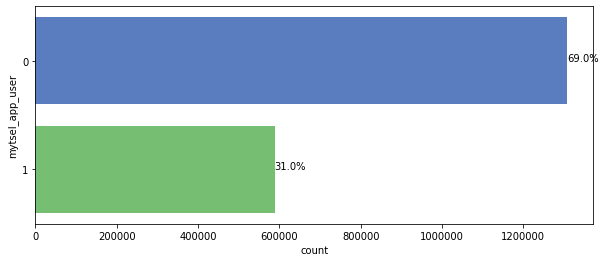

,count,mean,std,min,25%,50%,75%,max
mytsel_app_user,1895124.0,0.31027,0.462604,0.0,0.0,0.0,1.0,1.0


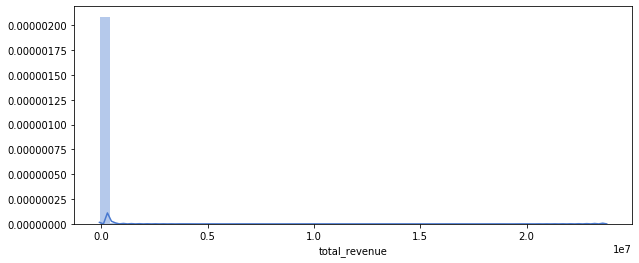

,count,mean,std,min,25%,50%,75%,max
total_revenue,1895124.0,70385.834121,94837.340058,-71868.0,0.0,54020.0,100996.0,23756492.0


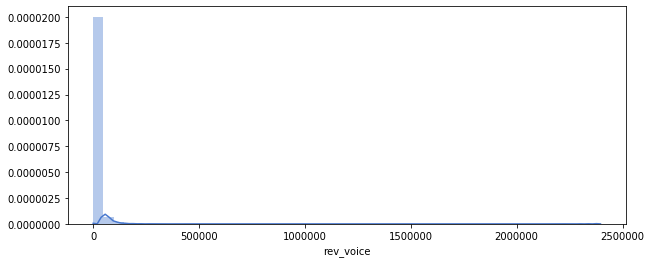

,count,mean,std,min,25%,50%,75%,max
rev_voice,1895124.0,6609.788183,20586.149225,0.0,0.0,0.0,2607.0,2395500.0


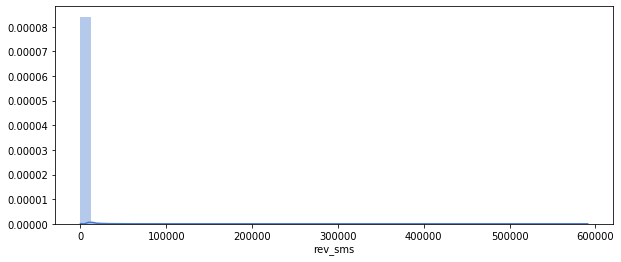

,count,mean,std,min,25%,50%,75%,max
rev_sms,1895124.0,527.667157,2941.500419,0.0,0.0,0.0,165.0,591000.0


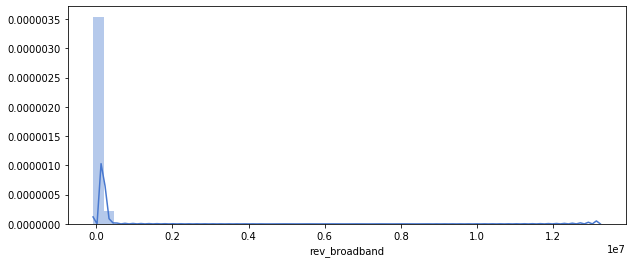

,count,mean,std,min,25%,50%,75%,max
rev_broadband,1895124.0,57957.831547,77089.162112,-74868.0,0.0,25000.0,80223.0,13225000.0


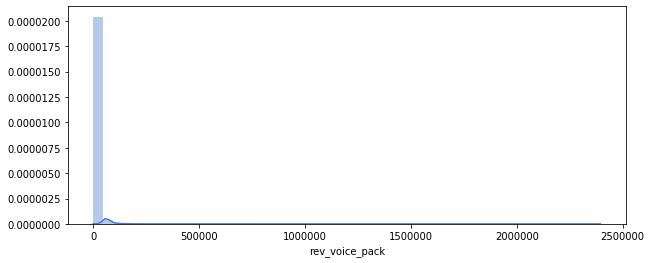

,count,mean,std,min,25%,50%,75%,max
rev_voice_pack,1895124.0,2654.762029,13699.357962,0.0,0.0,0.0,0.0,2395500.0


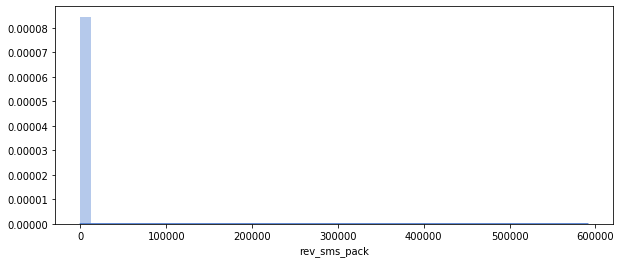

,count,mean,std,min,25%,50%,75%,max
rev_sms_pack,1895124.0,16.168008,942.580297,0.0,0.0,0.0,0.0,591000.0


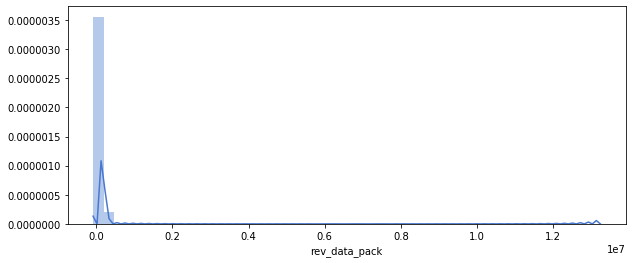

,count,mean,std,min,25%,50%,75%,max
rev_data_pack,1895124.0,55483.24905,74737.968449,-75000.0,0.0,17000.0,75000.0,13225000.0


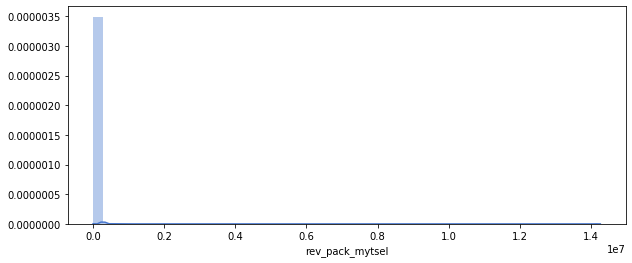

,count,mean,std,min,25%,50%,75%,max
rev_pack_mytsel,1895124.0,6977.439217,42322.477458,0.0,0.0,0.0,0.0,14265600.0


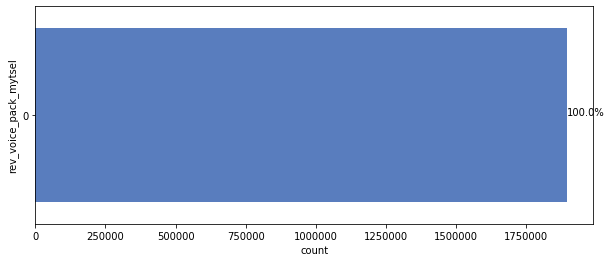

,count,mean,std,min,25%,50%,75%,max
rev_voice_pack_mytsel,1895124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


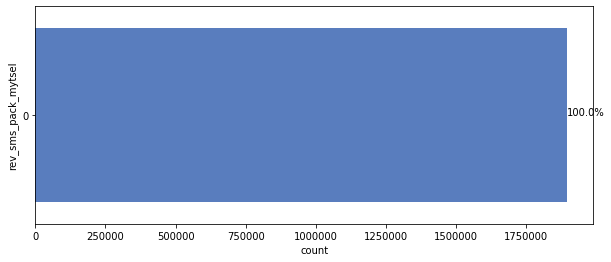

,count,mean,std,min,25%,50%,75%,max
rev_sms_pack_mytsel,1895124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


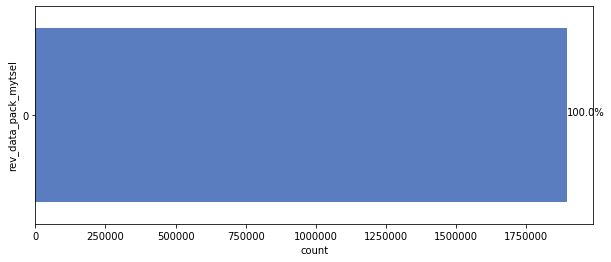

,count,mean,std,min,25%,50%,75%,max
rev_data_pack_mytsel,1895124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


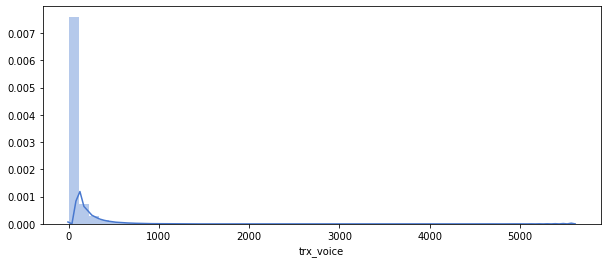

,count,mean,std,min,25%,50%,75%,max
trx_voice,1895124.0,55.253255,114.77905,0.0,0.0,8.0,57.0,5606.0


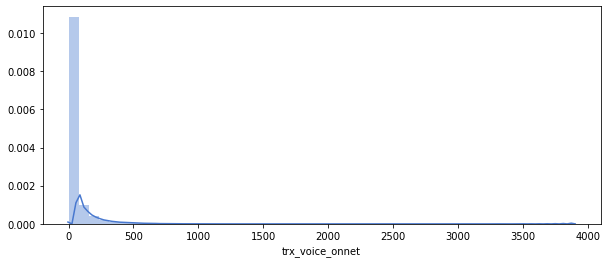

,count,mean,std,min,25%,50%,75%,max
trx_voice_onnet,1895124.0,42.146467,96.594388,0.0,0.0,5.0,38.0,3898.0


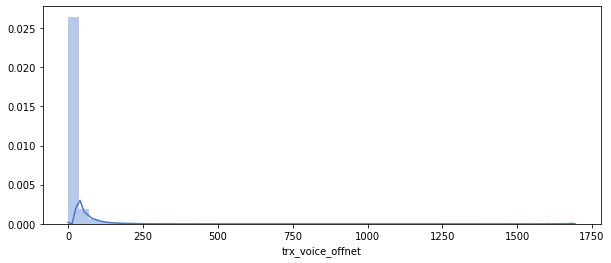

,count,mean,std,min,25%,50%,75%,max
trx_voice_offnet,1895124.0,11.508698,26.995492,0.0,0.0,0.0,10.0,1693.0


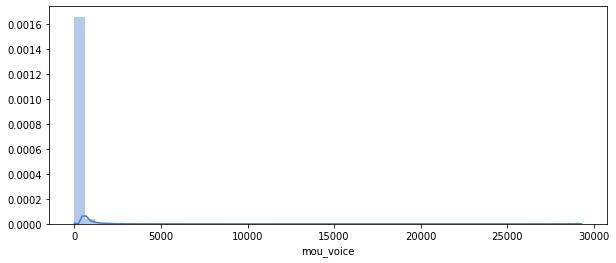

,count,mean,std,min,25%,50%,75%,max
mou_voice,1895124.0,89.85246,281.231946,0.0,0.0,7.0,74.0,29296.0


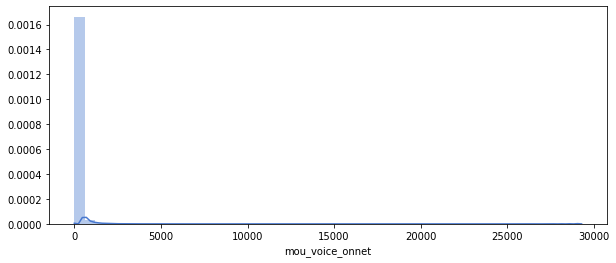

,count,mean,std,min,25%,50%,75%,max
mou_voice_onnet,1895124.0,76.75248,272.877341,0.0,0.0,3.0,48.0,29296.0


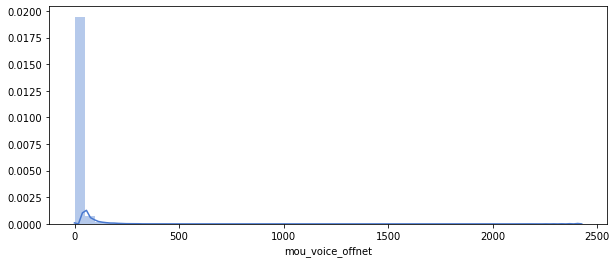

,count,mean,std,min,25%,50%,75%,max
mou_voice_offnet,1895124.0,10.186213,28.786578,0.0,0.0,0.0,7.0,2426.0


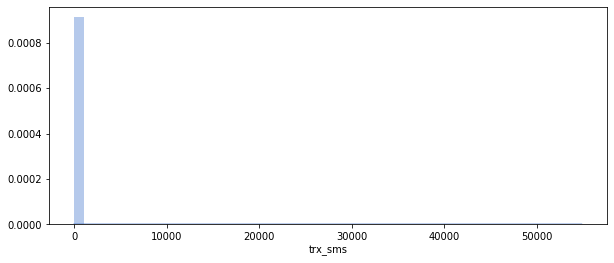

,count,mean,std,min,25%,50%,75%,max
trx_sms,1895124.0,7.396019,93.898936,0.0,0.0,0.0,4.0,54819.0


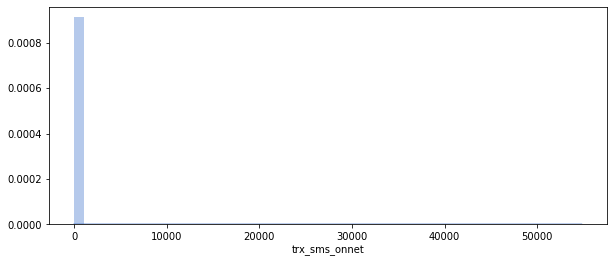

,count,mean,std,min,25%,50%,75%,max
trx_sms_onnet,1895124.0,6.004844,83.819476,0.0,0.0,0.0,2.0,54790.0


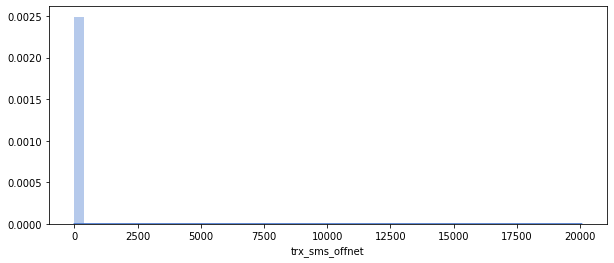

,count,mean,std,min,25%,50%,75%,max
trx_sms_offnet,1895124.0,1.227418,27.700831,0.0,0.0,0.0,0.0,20063.0


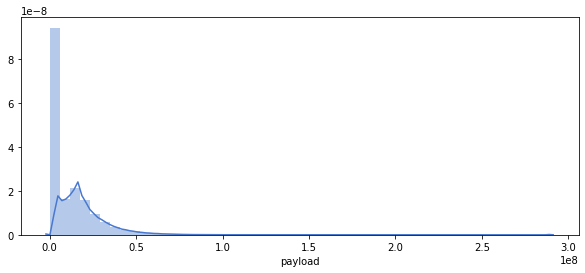

,count,mean,std,min,25%,50%,75%,max
payload,1895124.0,1.005550e+07,1.372514e+07,0.0,0.0,3217122.0,16800458.5,289082688.0


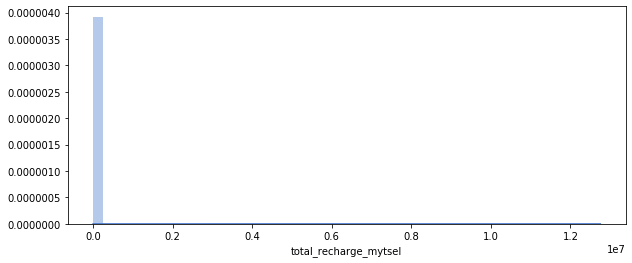

,count,mean,std,min,25%,50%,75%,max
total_recharge_mytsel,1895124.0,372.677461,18826.979758,0.0,0.0,0.0,0.0,12750000.0


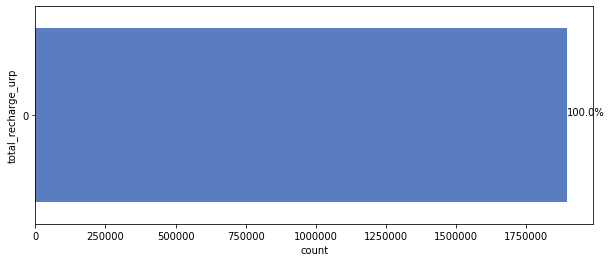

,count,mean,std,min,25%,50%,75%,max
total_recharge_urp,1895124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


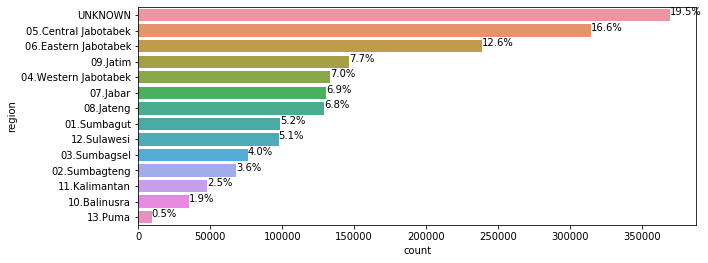

,count,unique,top,freq
region,1895124,14,UNKNOWN,369009


In [19]:
cols=df_usage.columns.to_list()
cols.remove('msisdn')
plot_data_profile(df_usage,cols)

Check Negative Value

In [20]:
df_usage[(df_usage.select_dtypes('number') < 0).any(axis=1)]

,msisdn,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,...,mou_voice,mou_voice_onnet,mou_voice_offnet,trx_sms,trx_sms_onnet,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region
545735,6281294369525,1,-19208,3432,1320,0,0,0,0,0,...,8,6,1,13,8,5,17013728,0,0,05.Central Jabotabek
964033,6281382222264,0,-71868,3000,0,-74868,0,0,-75000,0,...,4,2,0,0,0,0,3123461,0,0,05.Central Jabotabek


In [21]:
#Update negative revenue to positive
df_usage['total_revenue'] = df_usage['total_revenue'].apply(lambda x : np.abs(x) if (x < 0) else x)
df_usage['rev_broadband'] = df_usage['rev_broadband'].apply(lambda x : np.abs(x) if (x < 0) else x)
df_usage['rev_data_pack'] = df_usage['rev_data_pack'].apply(lambda x : np.abs(x) if (x < 0) else x)

### Ojol BCP

In [22]:
df_bcp.head(5)

,msisdn,first_rank_category
0,dsa_ojol_bcp.msisdn,dsa_ojol_bcp.first_rank_category
1,624122,NaN
2,6271392127580,NaN
3,6281109042277,NaN
4,6281110002514,NaN


In [23]:
#Delete first row
indexNames = df_bcp[ (df_bcp['msisdn'] == 'dsa_ojol_bcp.msisdn')].index
df_bcp.drop(indexNames , inplace=True)
print('Shape df_usage         : ',df_bcp.shape)

Shape df_usage         :  (1895124, 2)


In [24]:
show_data_profile(df_bcp)

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
first_rank_category,object,678120,55.72,14,1217004
msisdn,object,0,0.00,1895124,1895124


In [25]:
# Fill NA with 'Others'
df_bcp['first_rank_category'] = df_bcp['first_rank_category'].fillna('Others')

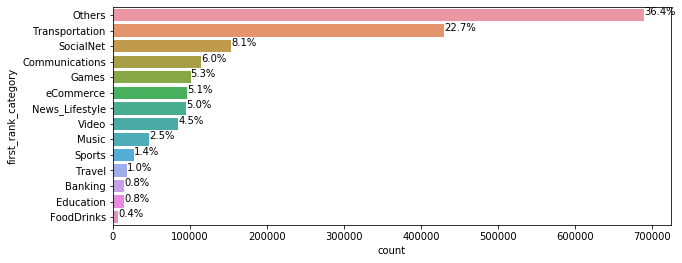

,count,unique,top,freq
first_rank_category,1895124,14,Others,690035


In [26]:
plot_data_profile(df_bcp,['first_rank_category'])

### Ojol Recharge

In [27]:
df_recharge.head(5)

,msisdn,total_recharge
0,dsa_ojol_recharge.msisdn,0
1,6281100185950,0
2,628111073788,0
3,628111095904,0
4,628111150993,0


In [28]:
#Delete first row
indexNames = df_recharge[ (df_recharge['msisdn'] == 'dsa_ojol_recharge.msisdn')].index
df_recharge.drop(indexNames , inplace=True)
print('Shape df_usage         : ',df_recharge.shape)

Shape df_usage         :  (1895124, 2)


In [29]:
show_data_profile(df_recharge)

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
total_recharge,int64,0,0.0,1205,1895124
msisdn,object,0,0.0,1895124,1895124


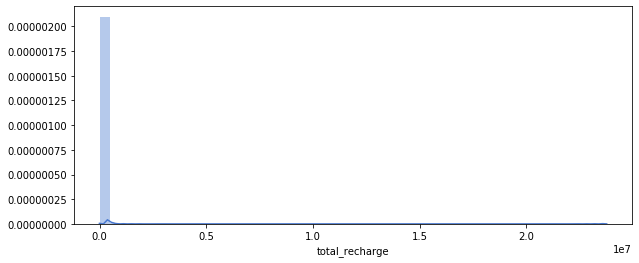

,count,mean,std,min,25%,50%,75%,max
total_recharge,1895124.0,69134.920987,109329.631145,0.0,0.0,45000.0,100000.0,23756000.0


In [30]:
plot_data_profile(df_recharge,['total_recharge'])

### Ojol MyTelkomsel

In [31]:
df_mytelkomsel.head(5)

,msisdn,ojol
0,dsa_ojol_mytsel.msisdn,dsa_ojol_m
1,628111000983,Y
2,628111002274,Y
3,628111014483,Y
4,628111017444,Y


In [32]:
#Delete first row
indexNames = df_mytelkomsel[ (df_mytelkomsel['msisdn'] == 'dsa_ojol_mytsel.msisdn')].index
df_mytelkomsel.drop(indexNames , inplace=True)
print('Shape df_usage         : ',df_mytelkomsel.shape)

Shape df_usage         :  (588001, 2)


In [33]:
show_data_profile(df_mytelkomsel)

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
ojol,object,0,0.0,1,588001
msisdn,object,0,0.0,588001,588001


In [34]:
df_mytelkomsel['ojol'].value_counts().reset_index()

,index,ojol
0,Y,588001


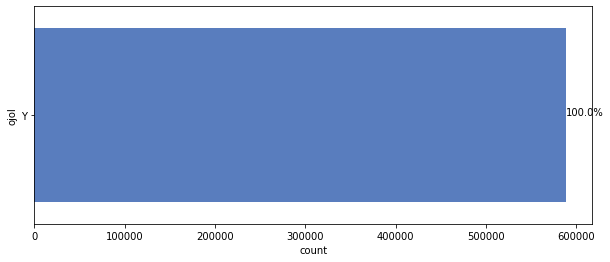

,count,unique,top,freq
ojol,588001,1,Y,588001


In [35]:
plot_data_profile(df_mytelkomsel,['ojol'])

### Entity Relationship Diagram  

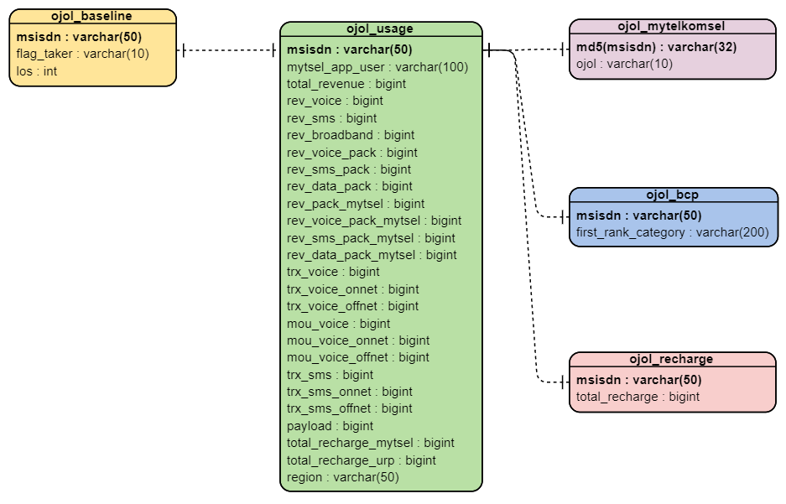

In [36]:
from IPython.display import Image
Image("ERDojol.png")

### Check Unique Key

In [37]:
print('Size of df_baseline      : ',df_baseline.shape)
print('Size of df_usage         : ',df_usage.shape)
print('Size of df_bcp           : ',df_bcp.shape)
print('Size of df_recharge      : ',df_recharge.shape)
print('Size of df_mytelkomsel   : ',df_mytelkomsel.shape)

Size of df_baseline      :  (1895124, 3)
Size of df_usage         :  (1895124, 26)
Size of df_bcp           :  (1895124, 2)
Size of df_recharge      :  (1895124, 2)
Size of df_mytelkomsel   :  (588001, 2)


In [38]:
print('Number of duplicated MSISDN :')
print('df_baseline     = ',df_baseline[df_baseline.duplicated(subset='msisdn')].shape[0])
print('df_usage        = ',df_usage[df_usage.duplicated(subset='msisdn')].shape[0])
print('df_bcp          = ',df_bcp[df_bcp.duplicated(subset='msisdn')].shape[0])
print('df_recharge     = ',df_recharge[df_recharge.duplicated(subset='msisdn')].shape[0])
print('df_mytelkomsel  = ',df_mytelkomsel[df_mytelkomsel.duplicated(subset='msisdn')].shape[0])

Number of duplicated MSISDN :
df_baseline     =  0
df_usage        =  0
df_bcp          =  0
df_recharge     =  0
df_mytelkomsel  =  0


In [39]:
#Ensure that all msisdn column is string and no whitespace as we will use it as key for merging
df_baseline['msisdn'] = df_baseline['msisdn'].astype(str).apply(lambda x: x.strip())
df_usage['msisdn'] = df_usage['msisdn'].astype(str).apply(lambda x: x.strip())
df_bcp['msisdn'] = df_bcp['msisdn'].astype(str).apply(lambda x: x.strip())
df_recharge['msisdn'] = df_recharge['msisdn'].astype(str).apply(lambda x: x.strip())
df_mytelkomsel['msisdn'] = df_mytelkomsel['msisdn'].astype(str).apply(lambda x: x.strip())

### Merge Data

In [40]:
df_baseline_usage = pd.merge(df_baseline,df_usage,how='left', on='msisdn')
df_baseline_usage_bcp = pd.merge(df_baseline_usage,df_bcp,how='left', on='msisdn')
df_baseline_usage_bcp_rechg = pd.merge(df_baseline_usage_bcp,df_recharge,how='left', on='msisdn')
df_baseline_usage_bcp_rechg_mytsel = pd.merge(df_baseline_usage_bcp_rechg,df_mytelkomsel ,how='left', on='msisdn')
df = df_baseline_usage_bcp_rechg_mytsel
df.shape

(1895124, 31)

In [41]:
show_data_profile(df)

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
ojol,object,1307123,222.3,1,588001
rev_voice_pack_mytsel,int64,0,0.0,1,1895124
rev_sms_pack_mytsel,int64,0,0.0,1,1895124
rev_data_pack_mytsel,int64,0,0.0,1,1895124
total_recharge_urp,int64,0,0.0,1,1895124
flag_taker,int64,0,0.0,2,1895124
mytsel_app_user,int32,0,0.0,2,1895124
region,object,0,0.0,14,1895124
first_rank_category,object,0,0.0,14,1895124
total_recharge_mytsel,int64,0,0.0,117,1895124


In [42]:
del df_baseline
del df_usage
del df_bcp
del df_recharge
del df_mytelkomsel
del df_baseline_usage
del df_baseline_usage_bcp
del df_baseline_usage_bcp_rechg
del df_baseline_usage_bcp_rechg_mytsel

#### Save merged data to file

In [43]:
df.to_csv('./data_new/df_merge.csv',index=False, sep='|')

## Explore Data

In [17]:
df = pd.read_csv('./data_new/df_merge.csv', sep='|')
df.shape

(1895124, 31)

### Verify Data Quality

In [18]:
show_data_profile(df)

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
ojol,object,1307123,222.3,1,588001
rev_voice_pack_mytsel,int64,0,0.0,1,1895124
rev_sms_pack_mytsel,int64,0,0.0,1,1895124
rev_data_pack_mytsel,int64,0,0.0,1,1895124
total_recharge_urp,int64,0,0.0,1,1895124
flag_taker,int64,0,0.0,2,1895124
mytsel_app_user,int64,0,0.0,2,1895124
region,object,0,0.0,14,1895124
first_rank_category,object,0,0.0,14,1895124
total_recharge_mytsel,int64,0,0.0,117,1895124


#### Fill NA ojol column with 'N'

In [19]:
df['ojol']=df['ojol'].fillna('N')

In [20]:
df.groupby(['mytsel_app_user','ojol'])['ojol'].count().reset_index(name='count')

,mytsel_app_user,ojol,count
0,0,N,1307123
1,1,Y,588001


In [21]:
show_data_profile(df)

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
rev_voice_pack_mytsel,int64,0,0.0,1,1895124
rev_sms_pack_mytsel,int64,0,0.0,1,1895124
rev_data_pack_mytsel,int64,0,0.0,1,1895124
total_recharge_urp,int64,0,0.0,1,1895124
flag_taker,int64,0,0.0,2,1895124
mytsel_app_user,int64,0,0.0,2,1895124
ojol,object,0,0.0,2,1895124
region,object,0,0.0,14,1895124
first_rank_category,object,0,0.0,14,1895124
total_recharge_mytsel,int64,0,0.0,117,1895124


#### Save initial data for later process

In [22]:
df_initial=df.copy()

In [23]:
#df=df_original

# **DATA PREPARATION**

## Reformat data

In [24]:
df['ojol']=df['ojol'].map({'Y':1,'N':0})

In [25]:
df['ojol']=df['ojol'].astype(int)

In [26]:
show_data_profile(df)

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
rev_voice_pack_mytsel,int64,0,0.0,1,1895124
rev_sms_pack_mytsel,int64,0,0.0,1,1895124
rev_data_pack_mytsel,int64,0,0.0,1,1895124
total_recharge_urp,int64,0,0.0,1,1895124
flag_taker,int64,0,0.0,2,1895124
mytsel_app_user,int64,0,0.0,2,1895124
ojol,int32,0,0.0,2,1895124
region,object,0,0.0,14,1895124
first_rank_category,object,0,0.0,14,1895124
total_recharge_mytsel,int64,0,0.0,117,1895124


## Select Data

### Drop columns which only have 1 unique value

In [27]:
df[['rev_voice_pack_mytsel','rev_sms_pack_mytsel','rev_data_pack_mytsel','total_recharge_urp']].drop_duplicates()

,rev_voice_pack_mytsel,rev_sms_pack_mytsel,rev_data_pack_mytsel,total_recharge_urp
0,0,0,0,0


In [28]:
df = df.drop(['rev_voice_pack_mytsel','rev_sms_pack_mytsel','rev_data_pack_mytsel','total_recharge_urp'],axis='columns')

### Drop identic column

In [29]:
df[['mytsel_app_user','ojol']].drop_duplicates()

,mytsel_app_user,ojol
0,1,1
1,0,0


In [30]:
df = df.drop(['ojol'],axis='columns')

### Drop ID Column (MSISDN)

In [31]:
df = df.drop(['msisdn'],axis='columns')

In [32]:
show_data_profile(df)

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
flag_taker,int64,0,0.0,2,1895124
mytsel_app_user,int64,0,0.0,2,1895124
region,object,0,0.0,14,1895124
first_rank_category,object,0,0.0,14,1895124
total_recharge_mytsel,int64,0,0.0,117,1895124
rev_sms_pack,int64,0,0.0,266,1895124
trx_voice_offnet,int64,0,0.0,485,1895124
trx_sms_offnet,int64,0,0.0,508,1895124
mou_voice_offnet,int64,0,0.0,703,1895124
total_recharge,int64,0,0.0,1205,1895124


In [33]:
df.shape

(1895124, 25)

## Target & Features Exploration

### Target

In [34]:
df['flag_taker'].value_counts().reset_index(name='count').rename(columns={'index':'flag_taker'})

,flag_taker,count
0,0,1347705
1,1,547419


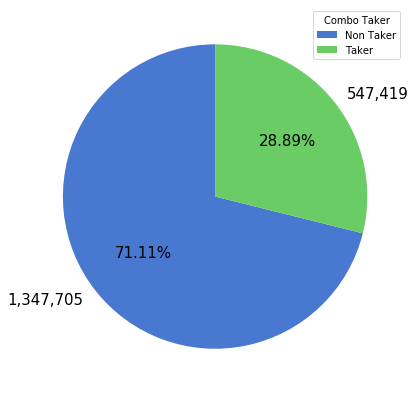

In [35]:
flag_taker_Pie=df['flag_taker'].value_counts().reset_index(name='count').rename(columns={'index':'flag_taker'})
flag_taker_Pie.plot(kind='pie', y = 'count', autopct='%1.2f%%', startangle=90, shadow=False, labels=['{:,}'.format(x) for x in flag_taker_Pie['count']], legend = True, fontsize=15, figsize=(7,7))
#plt.title("Combo Package Taker : 1=Yes , 0= No")
plt.legend(title='Combo Taker', loc='upper right', labels=['Non Taker', 'Taker'])
plt.xlabel('')
plt.ylabel('')
plt.show()

### Features & Target Correlation

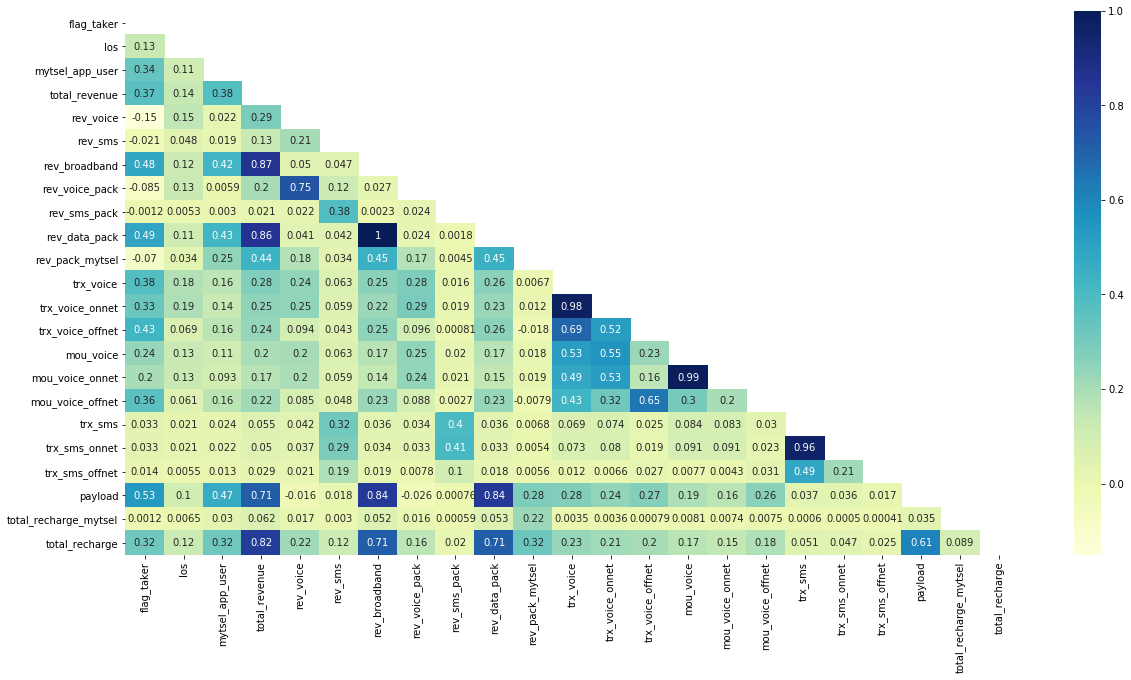

In [36]:
corr = df.corr()
mask = np.triu(corr)
#mask = np.tril(corr)
fig = plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt='.2g',cmap='YlGnBu',mask=mask)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

## Feature Engineering

### Generate Derived Attributes

In [39]:
df['d_ratio_rcgmytsel_rcg'] = df['total_recharge_mytsel']/df['total_recharge']
df['d_diff_rev_rcg'] = df['total_revenue']-df['total_recharge']
df['d_diff_revpackmytsel_rcgmytsel'] = df['rev_pack_mytsel']-df['total_recharge_mytsel']
df['d_ratio_revpackmytsel_revenue'] = df['rev_pack_mytsel']/df['total_revenue']
df['d_ratio_revbroadband_revenue'] = df['rev_broadband']/df['total_revenue']
df['d_ratio_revsms_revenue'] = df['rev_sms']/df['total_revenue']
df['d_ratio_revvoice_revenue'] = df['rev_voice']/df['total_revenue']
df['d_diff_revsms_revbroadband'] = df['rev_sms']-df['rev_broadband']
df['d_diff_revvoice_revbroadband'] = df['rev_voice']-df['rev_broadband']
df['d_diff_revvoice_rev_sms'] = df['rev_voice']-df['rev_sms']
df['d_ratio_mouvoiceoff_mouvoice'] = df['mou_voice_offnet']/df['mou_voice']
df['d_ratio_mouvoiceonn_mouvoice'] = df['mou_voice_onnet']/df['mou_voice']
df['d_ratio_trxsmsoff_trxsms'] = df['trx_sms_offnet']/df['trx_sms']
df['d_ratio_smsonnet_trx_sms'] = df['trx_sms_onnet']/df['trx_sms']
df['d_ratio_trxvoiceoff_trx_voice'] = df['trx_voice_offnet']/df['trx_voice']
df['d_ratio_trx_voiceonn_trx_voice'] = df['trx_voice_onnet']/df['trx_voice']

In [40]:
show_data_profile(df).sort_index()

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
d_diff_rev_rcg,int64,0,0.00,130434,1895124
d_diff_revpackmytsel_rcgmytsel,int64,0,0.00,4396,1895124
d_diff_revsms_revbroadband,int64,0,0.00,198689,1895124
d_diff_revvoice_rev_sms,int64,0,0.00,98021,1895124
d_diff_revvoice_revbroadband,int64,0,0.00,272488,1895124
d_ratio_mouvoiceoff_mouvoice,float64,762708,67.35,63256,1132416
d_ratio_mouvoiceonn_mouvoice,float64,762708,67.35,68752,1132416
d_ratio_rcgmytsel_rcg,float64,714555,60.53,812,1180569
d_ratio_revbroadband_revenue,float64,584625,44.61,575848,1310499
d_ratio_revpackmytsel_revenue,float64,584625,44.61,103700,1310499


In [41]:
df.fillna(0, inplace=True)

In [42]:
show_data_profile(df).sort_index()

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
d_diff_rev_rcg,int64,0,0.0,130434,1895124
d_diff_revpackmytsel_rcgmytsel,int64,0,0.0,4396,1895124
d_diff_revsms_revbroadband,int64,0,0.0,198689,1895124
d_diff_revvoice_rev_sms,int64,0,0.0,98021,1895124
d_diff_revvoice_revbroadband,int64,0,0.0,272488,1895124
d_ratio_mouvoiceoff_mouvoice,float64,0,0.0,63256,1895124
d_ratio_mouvoiceonn_mouvoice,float64,0,0.0,68752,1895124
d_ratio_rcgmytsel_rcg,float64,0,0.0,812,1895124
d_ratio_revbroadband_revenue,float64,0,0.0,575848,1895124
d_ratio_revpackmytsel_revenue,float64,0,0.0,103700,1895124


In [43]:
df.shape

(1895124, 41)

### One Hot Encoding

In [44]:
from sklearn.preprocessing import OneHotEncoder
df_object = df.select_dtypes('O')
enc = OneHotEncoder()
enc.fit(df_object)
df_object_transformed = enc.transform(df_object)
OHE_df = pd.DataFrame(df_object_transformed.toarray(),columns = enc.get_feature_names(df_object.columns))
OHE_df = OHE_df.astype(int)

# #Save encoder to pickle
# import pickle
# filename = 'OHE_object_features.pkl'
# pickle.dump(enc, open(filename, 'wb'))

# #Save column name of input encoder to pickle
# import pickle
# filename = 'OHE_input_columns.pkl'
# pickle.dump(df_object.columns, open(filename, 'wb'))

In [45]:
df_object.shape

(1895124, 2)

In [46]:
OHE_df.shape

(1895124, 28)

In [47]:
#Reset index of df so we can concat with OHE_df, as we previously do many operation that change the index. Otherwise, concat will produce more addtional row.
df = df.reset_index().drop(['index'], axis='columns')
#Combine df with OHE output
df = pd.concat([df,OHE_df], axis=1)
#Drop object data type features that already encoded
df = df.drop(df_object.columns, axis='columns')

In [48]:
df.shape

(1895124, 67)

In [49]:
show_data_profile(df).sort_index()

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
d_diff_rev_rcg,int64,0,0.0,130434,1895124
d_diff_revpackmytsel_rcgmytsel,int64,0,0.0,4396,1895124
d_diff_revsms_revbroadband,int64,0,0.0,198689,1895124
d_diff_revvoice_rev_sms,int64,0,0.0,98021,1895124
d_diff_revvoice_revbroadband,int64,0,0.0,272488,1895124
d_ratio_mouvoiceoff_mouvoice,float64,0,0.0,63256,1895124
d_ratio_mouvoiceonn_mouvoice,float64,0,0.0,68752,1895124
d_ratio_rcgmytsel_rcg,float64,0,0.0,812,1895124
d_ratio_revbroadband_revenue,float64,0,0.0,575848,1895124
d_ratio_revpackmytsel_revenue,float64,0,0.0,103700,1895124


# **MODELING**

## Machine Learning Pipeline

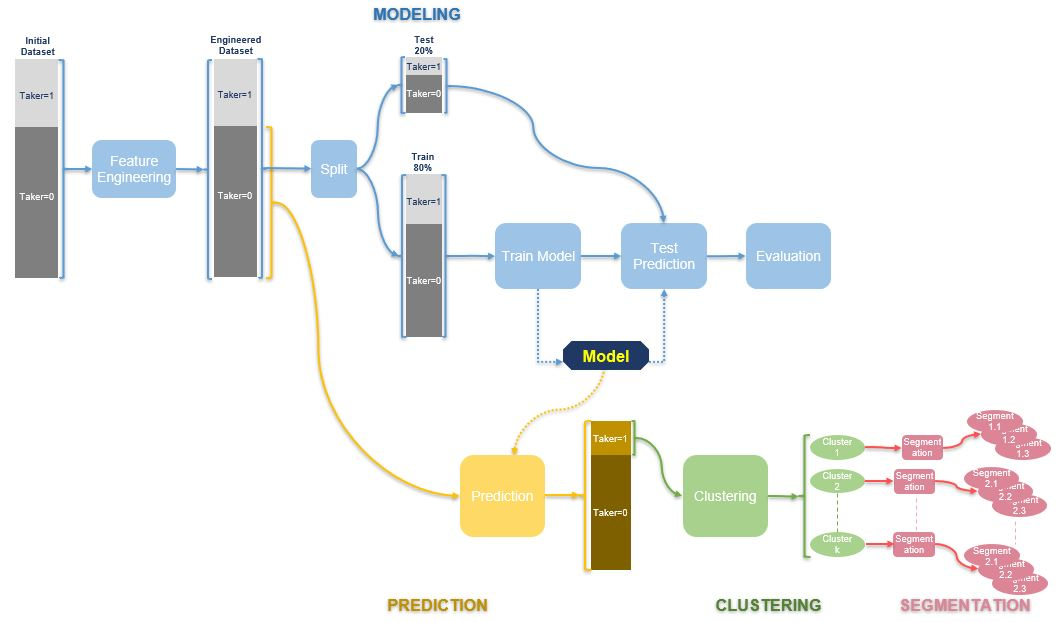

In [50]:
from IPython.display import Image
Image("ML_pipeline.JPG")

## Train Test Split

In [51]:
X= df.drop(['flag_taker'],axis='columns')
y= df['flag_taker']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1516099, 66)
(379025, 66)
(1516099,)
(379025,)


In [54]:
print(y_train[y_train==1].count())
print(y_train[y_train==0].count())
print(y_test[y_test==1].count())
print(y_test[y_test==0].count())

438196
1077903
109223
269802


## Modeling Algorithm Assessment & Selection

### Assess Algorithm

In [82]:
def modeling(X_train,y_train,X_test,y_test):
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import precision_recall_fscore_support
    
    #############################################
    #Linear Model
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    #Ensemble
    from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
    #XGBOOST
    from xgboost import XGBClassifier
    #################################################
    
    #linear Model
    logreg = LogisticRegression(random_state = 123)
    # Tree
    dt = DecisionTreeClassifier(random_state=123)
    #Ensemble
    randomforest = RandomForestClassifier()
    ada = AdaBoostClassifier()
    gdc = GradientBoostingClassifier()
    bagging = BaggingClassifier()
    xgb= XGBClassifier()
    
    classifiers = [logreg,dt,randomforest,bagging,ada,gdc, xgb]
    

    print("  AUC  | Precision | Recall | F1 Score |     Classifier")
    result=[]
    for clf, label in zip(classifiers, 
                      ['Logistic Regression',
                       'Decision Tree',
                       'Random Forest',
                       'Bagging',
                       'AdaBoost',
                       'GradBoost',
                       'XGBoost']):

        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        y_proba_pred = clf.predict_proba(X_test)[:,1]
        auc_score = roc_auc_score(y_test,y_proba_pred)
        prfs_score = precision_recall_fscore_support(y_test,y_pred,average='macro')
        print("%0.4f |  %0.4f   | %0.4f |  %0.4f  | %s" % (auc_score, prfs_score[0],prfs_score[1],prfs_score[2],label))

        result.append([label,auc_score,prfs_score[0],prfs_score[1],prfs_score[2]])
    df_result = pd.DataFrame(result,columns=['Classifier','AUC Score','Precision','Recall','F1 Score'])
    return df_result

In [84]:
df_score = modeling(X_train,y_train,X_test,y_test)

  AUC  | Precision | Recall | F1 Score |     Classifier
0.8953 |  0.8129   | 0.8658 |  0.8259  | Logistic Regression
0.8994 |  0.9026   | 0.8994 |  0.9010  | Decision Tree
0.9820 |  0.9290   | 0.9510 |  0.9390  | Random Forest
0.9766 |  0.9261   | 0.9386 |  0.9320  | Bagging
0.9799 |  0.9232   | 0.9401 |  0.9311  | AdaBoost
0.9813 |  0.9260   | 0.9480 |  0.9359  | GradBoost
0.9809 |  0.9247   | 0.9461 |  0.9344  | XGBoost


In [85]:
df_score

,Classifier,AUC Score,Precision,Recall,F1 Score
0,Logistic Regression,0.895286,0.812913,0.865844,0.825888
1,Decision Tree,0.899437,0.902632,0.899437,0.901012
2,Random Forest,0.982003,0.929038,0.950984,0.938959
3,Bagging,0.976598,0.926070,0.938642,0.932020
4,AdaBoost,0.979888,0.923230,0.940139,0.931060
5,GradBoost,0.981333,0.925954,0.948048,0.935922
6,XGBoost,0.980862,0.924730,0.946096,0.934403


### Cross Validation

In [86]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Dtratified K Fold
from sklearn.model_selection import StratifiedKFold
#Cross Validation Score
from sklearn.model_selection import cross_val_score

#### AUC mean Score

In [87]:
scores_auc = cross_val_score(rf, X_train, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=123), scoring='roc_auc',verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 46.9min finished


In [88]:
scores_auc

array([0.98153785, 0.98185089, 0.98157329, 0.98219701, 0.98177427])

In [89]:
print("AUC of ROC : %0.4f (+/- %0.4f) [%s]" % (scores_auc.mean(), scores_auc.std(), 'Random Forest'))

AUC of ROC : 0.9818 (+/- 0.0002) [Random Forest]


#### F1 mean Score

In [90]:
scores_f1 = cross_val_score(rf, X_train, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=123), scoring='f1_macro',verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 47.1min finished


In [91]:
scores_f1

array([0.93838959, 0.93907593, 0.93882314, 0.93955793, 0.93895906])

In [92]:
print("F1 Macro : %0.4f (+/- %0.4f) [%s]"   % (scores_f1.mean(), scores_f1.std(), 'Random Forest'))

F1 Macro : 0.9390 (+/- 0.0004) [Random Forest]


## Reduce n_estimators and max_depth

In [93]:
def calculate_score(max_depth,n_estimators,scoring):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_score
    rf = RandomForestClassifier(max_depth=max_depth,n_estimators=n_estimators)
    rf.fit(X_train,y_train)
    auc_score =cross_val_score(rf, X_train, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=123), scoring=scoring,verbose=0)
    print("max_depth=%0.0f | n_estimators=%0.0f | %s=%0.4f " % (max_depth, n_estimators,scoring , auc_score.mean()))

In [94]:
max_depth=[3,2,1]
n_estimators=[3,2,1]
for i in max_depth:
    for j in n_estimators:
        calculate_score(i,j,'roc_auc')

max_depth=3 | n_estimators=3 | roc_auc=0.9670 
max_depth=3 | n_estimators=2 | roc_auc=0.9574 
max_depth=3 | n_estimators=1 | roc_auc=0.9441 
max_depth=2 | n_estimators=3 | roc_auc=0.9407 
max_depth=2 | n_estimators=2 | roc_auc=0.9504 
max_depth=2 | n_estimators=1 | roc_auc=0.8894 
max_depth=1 | n_estimators=3 | roc_auc=0.9201 
max_depth=1 | n_estimators=2 | roc_auc=0.9062 
max_depth=1 | n_estimators=1 | roc_auc=0.8357 


In [95]:
max_depth=[3,2,1]
n_estimators=[3,2,1]
for i in max_depth:
    for j in n_estimators:
        calculate_score(i,j,'f1_macro')

max_depth=3 | n_estimators=3 | f1_macro=0.8973 
max_depth=3 | n_estimators=2 | f1_macro=0.8821 
max_depth=3 | n_estimators=1 | f1_macro=0.8652 
max_depth=2 | n_estimators=3 | f1_macro=0.8725 
max_depth=2 | n_estimators=2 | f1_macro=0.8557 
max_depth=2 | n_estimators=1 | f1_macro=0.8311 
max_depth=1 | n_estimators=3 | f1_macro=0.8286 
max_depth=1 | n_estimators=2 | f1_macro=0.8261 
max_depth=1 | n_estimators=1 | f1_macro=0.7317 


In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
rf = RandomForestClassifier(n_estimators=3,max_depth=1,random_state=43)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_train)
y_proba_pred = rf.predict_proba(X_train)[:,1]
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print("AUC Score : %0.15f" % roc_auc_score(y_train,y_proba_pred))
feature_importances.head(10)

AUC Score : 0.904875670732045


,importance
rev_data_pack,0.666667
d_diff_revvoice_revbroadband,0.333333
region_04.Western Jabotabek,0.000000
region_10.Balinusra,0.000000
region_09.Jatim,0.000000
region_08.Jateng,0.000000
region_07.Jabar,0.000000
region_06.Eastern Jabotabek,0.000000
region_05.Central Jabotabek,0.000000
los,0.000000


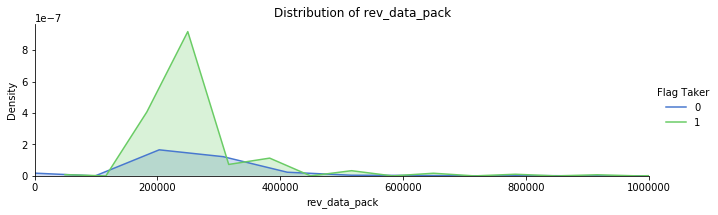

In [177]:
g = sns.FacetGrid(df, hue='flag_taker',height=3, aspect=3)
g = g.map(sns.kdeplot, "rev_data_pack", shade=True)
plt.xlim(-0.1,1000000)
g.add_legend(title="Flag Taker")
g.set_ylabels("Density")
g.fig.suptitle("Distribution of rev_data_pack")
g.fig.show()

In [180]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 135)
logreg.fit(X_train[['rev_data_pack','d_diff_revvoice_revbroadband']],y_train)
y_pred = logreg.predict(X_train[['rev_data_pack','d_diff_revvoice_revbroadband']])
y_proba_pred = logreg.predict_proba(X_train[['rev_data_pack','d_diff_revvoice_revbroadband']])[:,1]
auc_score = roc_auc_score(y_train,y_proba_pred)
prfs_score = precision_recall_fscore_support(y_train,y_pred,average='macro')
print("  AUC  | Precision | Recall | F1 Score |     Classifier")
print("%0.4f |  %0.4f   | %0.4f |  %0.4f  | %s" % (auc_score, prfs_score[0],prfs_score[1],prfs_score[2],'LogisticRegression'))

  AUC  | Precision | Recall | F1 Score |     Classifier
0.8441 |  0.7774   | 0.8361 |  0.7767  | LogisticRegression


In [99]:
calculate_score(1,100,'roc_auc')

max_depth=1 | n_estimators=100 | roc_auc=0.9489 


In [100]:
calculate_score(1,100,'f1_macro')

max_depth=1 | n_estimators=100 | f1_macro=0.8679 


## Model Fitting

### Fitting

In [699]:
from sklearn.linear_model import LogisticRegression
rf = LogisticRegression(random_state=321)
rf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=321, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [708]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'penalty':['l1','l2'],
 'solver':['lbfgs','liblinear']
}
gsearch1 = GridSearchCV(estimator = LogisticRegression(), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=-1,cv=5)
gsearch1.fit(X_train,y_train)
print(gsearch1.best_params_)
print(gsearch1.best_score_)
best_penalty = gsearch1.best_params_['penalty']
best_solver = gsearch1.best_params_['solver']

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "C:\Users\Singgihher\Anaconda3\envs\py36\lib\site-packages\joblib\externals\loky\backend\queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "C:\Users\Singgihher\Anaconda3\envs\py36\lib\site-packages\joblib\externals\loky\backend\reduction.py", line 243, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "C:\Users\Singgihher\Anaconda3\envs\py36\lib\site-packages\joblib\externals\loky\backend\reduction.py", line 236, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "C:\Users\Singgihher\Anaconda3\envs\py36\lib\site-packages\joblib\externals\cloudpickle\cloudpickle.py", line 267, in dump
    return Pickler.dump(self, obj)
  File "C:\Users\Singgihher\Anaconda3\envs\py36\lib\pickle.py", line 409, in dump
    self.save(obj)
  File "C:\Users\Singgihher\Anaconda3\envs\py36\lib\pickle.py", line 521, in save
    self.save_reduce(ob

PicklingError: Could not pickle the task to send it to the workers.

### Save model to pickle

In [110]:
import pickle
filename = 'lr_predict_ojol_package_taker.pkl'
pickle.dump(rf, open(filename, 'wb'))

# **EVALUATION**

In [683]:
from sklearn.externals import joblib
rf = joblib.load("lr_predict_ojol_package_taker.pkl")

In [700]:
y_pred = rf.predict(X_test)
y_proba_pred = rf.predict_proba(X_test)[:,1]

## Feature Importance

In [701]:
feature_importances = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(np.abs(rf.coef_)))], axis = 1)
feature_importances.columns=['feature_name','importance']
feature_importances.sort_values(by='importance', ascending=False, inplace = True)
feature_importances.set_index('feature_name', inplace =True)
feature_importances.rename_axis(None, inplace=True)
feature_importances = feature_importances.head(40)

In [78]:
# feature_importances = pd.DataFrame(rf.feature_importances_,
#                                    index = X_train.columns,
#                                     columns=['importance']).sort_values('importance',ascending=False)
# feature_importances.head(10)

In [702]:
feat_imp = feature_importances.reset_index().rename(columns={'index':'features'})

In [113]:
#feat_imp = feat_imp.replace({"features": dict_derived})

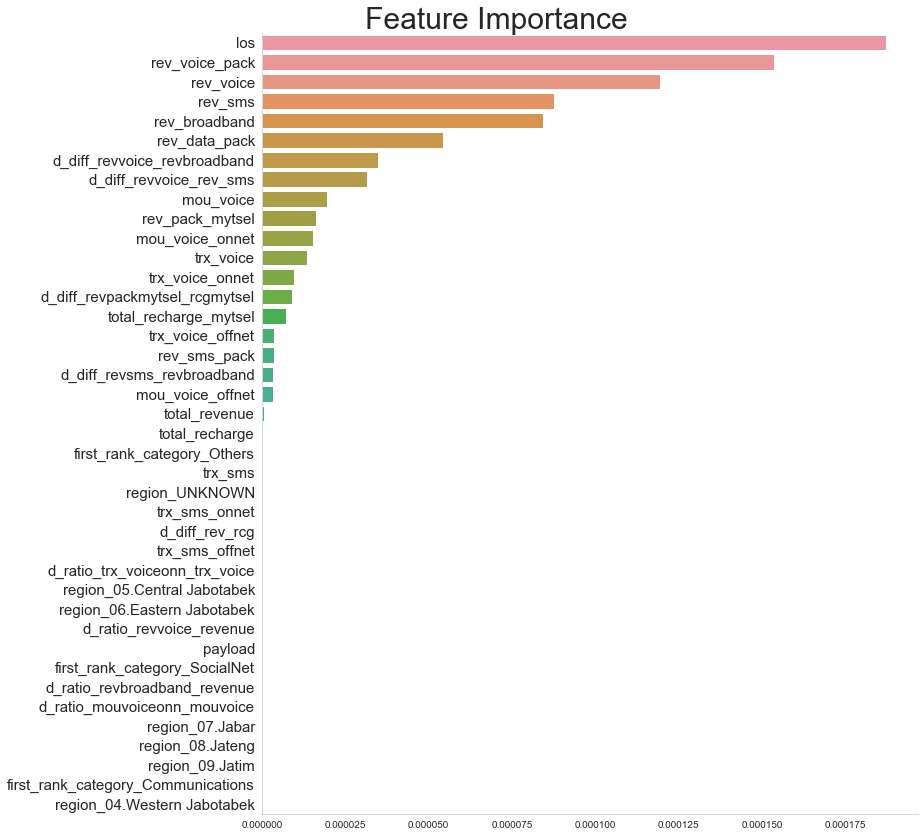

In [703]:
g = sns.catplot(data=feat_imp,x='importance',y='features',kind='bar',height=12, aspect=1,legend=False)
g.fig.subplots_adjust(top=0.95)
g.set_ylabels("")
g.set_xlabels("")
g.fig.suptitle("Feature Importance",size=30)
plt.yticks(fontsize=15)    
g.fig.show()

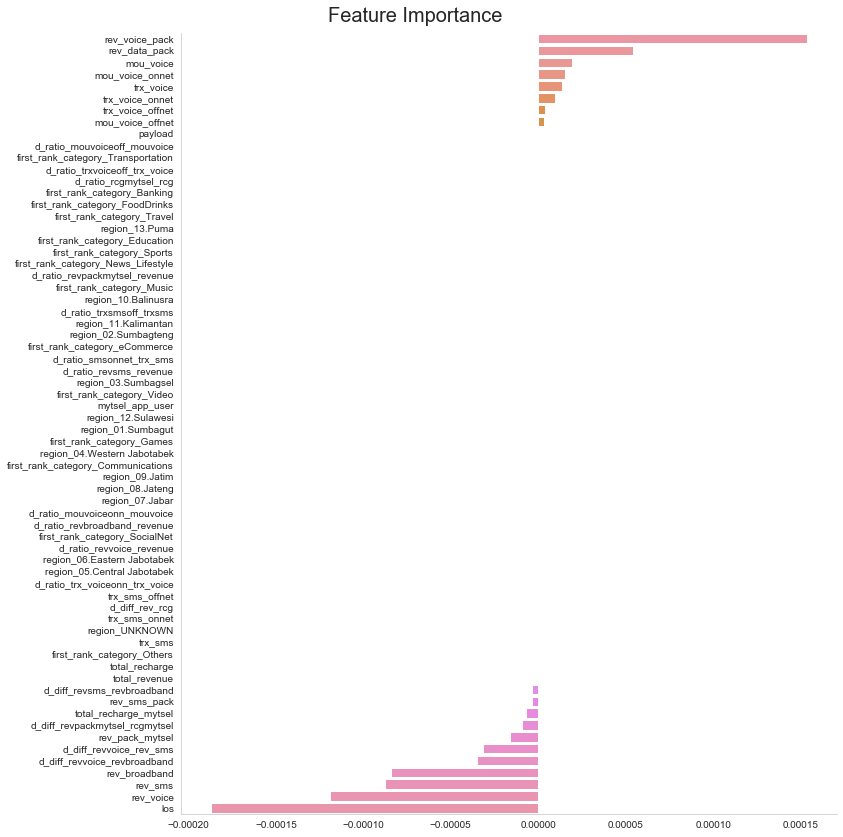

In [704]:
feature_importances = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(rf.coef_))], axis = 1)
feature_importances.columns=['feature_name','importance']
feature_importances.sort_values(by='importance', ascending=False, inplace = True)
feature_importances.set_index('feature_name', inplace =True)
feature_importances.rename_axis(None, inplace=True)
#feature_importances = feature_importances.head(40)

feat_imp = feature_importances.reset_index().rename(columns={'index':'features'})

g = sns.catplot(data=feat_imp,x='importance',y='features',kind='bar',height=12, aspect=1,legend=False)
g.fig.subplots_adjust(top=0.95)
g.set_ylabels("")
g.set_xlabels("")
g.fig.suptitle("Feature Importance",size=20)
plt.yticks(fontsize=10)    
g.fig.show()

In [686]:
X_train.columns

Index(['los', 'mytsel_app_user', 'total_revenue', 'rev_voice', 'rev_sms',
       'rev_broadband', 'rev_voice_pack', 'rev_sms_pack', 'rev_data_pack',
       'rev_pack_mytsel', 'trx_voice', 'trx_voice_onnet', 'trx_voice_offnet',
       'mou_voice', 'mou_voice_onnet', 'mou_voice_offnet', 'trx_sms',
       'trx_sms_onnet', 'trx_sms_offnet', 'payload', 'total_recharge_mytsel',
       'total_recharge', 'd_ratio_rcgmytsel_rcg', 'd_diff_rev_rcg',
       'd_diff_revpackmytsel_rcgmytsel', 'd_ratio_revpackmytsel_revenue',
       'd_ratio_revbroadband_revenue', 'd_ratio_revsms_revenue',
       'd_ratio_revvoice_revenue', 'd_diff_revsms_revbroadband',
       'd_diff_revvoice_revbroadband', 'd_diff_revvoice_rev_sms',
       'd_ratio_mouvoiceoff_mouvoice', 'd_ratio_mouvoiceonn_mouvoice',
       'd_ratio_trxsmsoff_trxsms', 'd_ratio_smsonnet_trx_sms',
       'd_ratio_trxvoiceoff_trx_voice', 'd_ratio_trx_voiceonn_trx_voice',
       'region_01.Sumbagut', 'region_02.Sumbagteng', 'region_03.Sumbagsel',
   

In [687]:
rf.coef_

array([[-2.05874573e-05, -9.60683787e-10, -2.58557399e-06,
        -5.17102382e-05, -6.42327960e-06, -2.43173770e-05,
         4.76655456e-06,  1.04307508e-08,  2.25418599e-05,
        -1.34626574e-05,  1.03775568e-06,  7.19624777e-07,
         2.92829164e-07,  1.49227854e-06,  1.16855345e-06,
         2.58231563e-07,  4.09992121e-09,  9.54810086e-09,
        -2.27171467e-09,  3.56467701e-08, -5.41830428e-06,
        -1.46822236e-06, -2.98579489e-11, -1.11735163e-06,
        -8.04435315e-06, -4.13299866e-10, -2.64302613e-09,
        -8.23548205e-10, -3.97064182e-09,  1.78940975e-05,
        -2.73928611e-05, -4.52869586e-05,  5.21594814e-10,
        -3.06040784e-09, -7.18468628e-10, -1.12426768e-09,
        -1.91626482e-10, -4.47743281e-09, -1.18061136e-09,
        -6.09264860e-10, -9.19175562e-10, -1.55424303e-09,
        -3.50794374e-09, -3.17788177e-09, -1.87478454e-09,
        -1.83370219e-09, -1.81140067e-09, -5.05482015e-10,
        -5.93389954e-10, -9.83759830e-10, -5.50423880e-1

In [685]:
feature_importances

,importance
rev_data_pack,2.254186e-05
d_diff_revsms_revbroadband,1.789410e-05
rev_voice_pack,4.766555e-06
mou_voice,1.492279e-06
mou_voice_onnet,1.168553e-06
trx_voice,1.037756e-06
trx_voice_onnet,7.196248e-07
trx_voice_offnet,2.928292e-07
mou_voice_offnet,2.582316e-07
payload,3.564677e-08


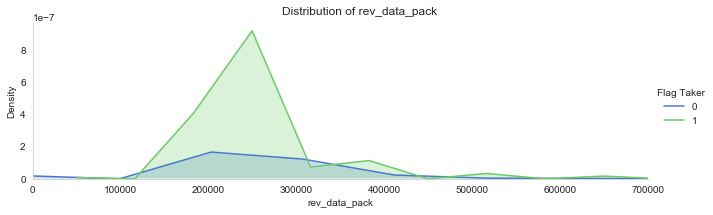

In [503]:
g = sns.FacetGrid(df, hue='flag_taker',height=3, aspect=3)
g = g.map(sns.kdeplot, "rev_data_pack", shade=True)
plt.xlim(-0.1,700000)
g.add_legend(title="Flag Taker")
g.set_ylabels("Density")
g.fig.suptitle("Distribution of rev_data_pack")
g.fig.show()

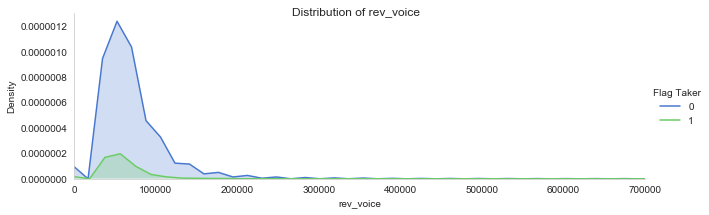

In [504]:
g = sns.FacetGrid(df, hue='flag_taker',height=3, aspect=3)
g = g.map(sns.kdeplot, "rev_voice", shade=True)
plt.xlim(-0.1,700000)
g.add_legend(title="Flag Taker")
g.set_ylabels("Density")
g.fig.suptitle("Distribution of rev_voice")
g.fig.show()

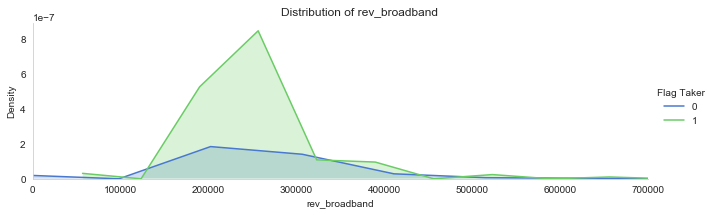

In [692]:
g = sns.FacetGrid(df, hue='flag_taker',height=3, aspect=3)
g = g.map(sns.kdeplot, "rev_broadband", shade=True)
plt.xlim(-0.1,700000)
g.add_legend(title="Flag Taker")
g.set_ylabels("Density")
g.fig.suptitle("Distribution of rev_broadband")
g.fig.show()

## Confusion Matrix

In [119]:
from sklearn.metrics import confusion_matrix
df_confmat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['nonTaker','Taker'],index=['nonTaker','Taker'])
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted'
df_confmat

Predicted,nonTaker,Taker
True,,
nonTaker,219003,50799
Taker,8741,100482


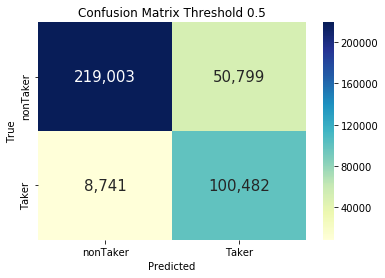

In [250]:

conf_mat= pd.DataFrame(confusion_matrix(y_test, y_pred))
fig = plt.figure(figsize=(6,4))
ax = sns.heatmap(conf_mat, annot=True, fmt=',g',cmap='YlGnBu', annot_kws={"size": 15})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Threshold 0.5')
ax.xaxis.set_ticklabels(['nonTaker', 'Taker'])
ax.yaxis.set_ticklabels(['nonTaker', 'Taker'])
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()


### Assess Probability Threshold

In [121]:
np.unique(y_pred)

array([0, 1], dtype=int64)

In [122]:
np.unique(y_proba_pred)

array([1.66208797e-163, 2.49869842e-082, 1.00332346e-075, ...,
       9.99759084e-001, 9.99887859e-001, 9.99989524e-001])

In [123]:
y_proba_pred_30 = [1. if y_cont > .3  else 0. for y_cont in y_proba_pred]
df_confmat = pd.DataFrame(confusion_matrix(y_test, y_proba_pred_30), columns=['nonTaker','Taker'],index=['nonTaker','Taker'])
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted'
df_confmat

Predicted,nonTaker,Taker
True,,
nonTaker,65128,204674
Taker,4647,104576


In [124]:
y_proba_pred_40 = [1. if y_cont > .4  else 0. for y_cont in y_proba_pred]
df_confmat = pd.DataFrame(confusion_matrix(y_test, y_proba_pred_40), columns=['nonTaker','Taker'],index=['nonTaker','Taker'])
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted'
df_confmat

Predicted,nonTaker,Taker
True,,
nonTaker,79328,190474
Taker,6266,102957


In [125]:
y_proba_pred_60 = [1. if y_cont > .6  else 0. for y_cont in y_proba_pred]
df_confmat = pd.DataFrame(confusion_matrix(y_test, y_proba_pred_60), columns=['nonTaker','Taker'],index=['nonTaker','Taker'])
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted'
df_confmat

Predicted,nonTaker,Taker
True,,
nonTaker,242604,27198
Taker,16714,92509


In [232]:
y_proba_pred_70 = [1. if y_cont > .7  else 0. for y_cont in y_proba_pred]
df_confmat = pd.DataFrame(confusion_matrix(y_test, y_proba_pred_70), columns=['nonTaker','Taker'],index=['nonTaker','Taker'])
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted'
df_confmat

Predicted,nonTaker,Taker
True,,
nonTaker,257610,12192
Taker,54256,54967


## ROC AUC Score

In [126]:
from sklearn.metrics import roc_auc_score
print ('AUC Score : %0.15f' %roc_auc_score(y_test,y_proba_pred))

AUC Score : 0.895285692718524


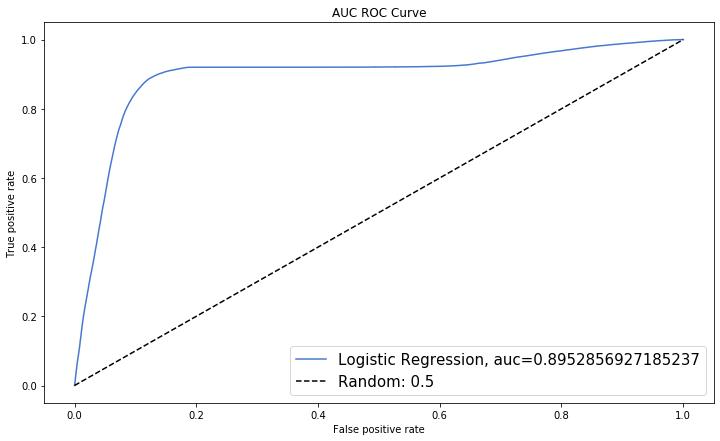

In [236]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_proba_pred)
auc = metrics.roc_auc_score(y_test, y_proba_pred)
plt.subplots(figsize=(12,7))
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC ROC Curve')
plt.legend(loc=4,fontsize=15)
plt.show()

## Classification Report

In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88    269802
           1       0.66      0.92      0.77    109223

    accuracy                           0.84    379025
   macro avg       0.81      0.87      0.83    379025
weighted avg       0.88      0.84      0.85    379025



In [129]:
class_report = classification_report(y_test, y_pred, output_dict=True)
df_class_report = pd.DataFrame(class_report).transpose()
df_class_report

,precision,recall,f1-score,support
0,0.961619,0.811717,0.880333,269802.000000
1,0.664208,0.919971,0.771443,109223.000000
accuracy,0.842913,0.842913,0.842913,0.842913
macro avg,0.812913,0.865844,0.825888,379025.000000
weighted avg,0.875915,0.842913,0.848954,379025.000000


# **PREDICTION**

## Load Model

In [130]:
from sklearn.externals import joblib
rf = joblib.load("lr_predict_ojol_package_taker.pkl")

## Predict nonTaker who most likely will become Taker

In [131]:
#Select nonTaker from initial data
df_initial_nonTaker = df_initial[df_initial['flag_taker']==0]
df_initial_nonTaker.shape

(1347705, 31)

In [132]:
#Select nonTaker from engineered data
df_engineered_nonTaker = df[df['flag_taker']==0]
#Drop flag_taker column as we will pass it to model
df_engineered_nonTaker = df_engineered_nonTaker.drop('flag_taker', axis='columns')
df_engineered_nonTaker.shape

(1347705, 66)

### Predict Non Taker

In [133]:
#Predict nonTaker whether he will become Taker or not
nonTaker_predicted = rf.predict(df_engineered_nonTaker)
nonTaker_predicted_proba = rf.predict_proba(df_engineered_nonTaker)[:,1]

### Map MSISDN with prediction result

In [134]:
# Mapped the prediction result to initial nonTaker data
df_initial_nonTaker['flag_taker_predicted'] = nonTaker_predicted

In [135]:
df_initial_nonTaker.head(3)

,msisdn,flag_taker,los,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,...,trx_sms_onnet,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region,first_rank_category,total_recharge,ojol,flag_taker_predicted
0,628111006169,0,965.0,1,0,0,0,0,0,0,...,0,0,9004784,0,0,05.Central Jabotabek,Music,0,Y,1
1,628111042616,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,UNKNOWN,Others,0,N,0
2,628111404401,0,859.0,1,155709,429,0,66000,0,0,...,0,0,44127816,0,0,06.Eastern Jabotabek,Transportation,0,Y,1


### Confusion Matrix

#### Threshold 0.5

In [136]:
from sklearn.metrics import confusion_matrix
df_confmat = pd.DataFrame(confusion_matrix(df_initial_nonTaker['flag_taker'], df_initial_nonTaker['flag_taker_predicted']), columns=['nonTaker','Taker'],index=['nonTaker','Taker'])
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted'
df_confmat

Predicted,nonTaker,Taker
True,,
nonTaker,1092302,255403
Taker,0,0


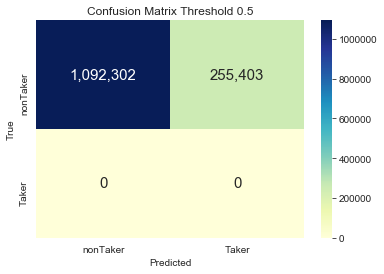

In [510]:
conf_mat= pd.DataFrame(confusion_matrix(df_initial_nonTaker['flag_taker'], df_initial_nonTaker['flag_taker_predicted']))
fig = plt.figure(figsize=(6,4))
ax = sns.heatmap(conf_mat, annot=True, fmt=',',cmap='YlGnBu', annot_kws={"size": 15})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Threshold 0.5')
ax.xaxis.set_ticklabels(['nonTaker', 'Taker'])
ax.yaxis.set_ticklabels(['nonTaker', 'Taker'])
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()


#### Test Other Threshold

In [674]:
y_proba_pred_30 = [1. if y_cont > .3  else 0. for y_cont in nonTaker_predicted_proba]
df_confmat = pd.DataFrame(confusion_matrix(df_initial_nonTaker['flag_taker'], y_proba_pred_30), columns=['nonTaker','Taker'],index=['nonTaker','Taker'])
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted 0.3'
display(df_confmat)

y_proba_pred_40 = [1. if y_cont > .4  else 0. for y_cont in nonTaker_predicted_proba]
df_confmat = pd.DataFrame(confusion_matrix(df_initial_nonTaker['flag_taker'], y_proba_pred_40), columns=['nonTaker','Taker'],index=['nonTaker','Taker'])
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted 0.4'
display(df_confmat)

y_proba_pred_60 = [1. if y_cont > .6  else 0. for y_cont in nonTaker_predicted_proba]
df_confmat = pd.DataFrame(confusion_matrix(df_initial_nonTaker['flag_taker'], y_proba_pred_60), columns=['nonTaker','Taker'],index=['nonTaker','Taker'])
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted 0.6'
display(df_confmat)

y_proba_pred_70 = [1. if y_cont > .7  else 0. for y_cont in nonTaker_predicted_proba]
df_confmat = pd.DataFrame(confusion_matrix(df_initial_nonTaker['flag_taker'], y_proba_pred_70), columns=['nonTaker','Taker'],index=['nonTaker','Taker'])
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted 0.7'
display(df_confmat)

y_proba_pred_80 = [1. if y_cont > .8  else 0. for y_cont in nonTaker_predicted_proba]
df_confmat = pd.DataFrame(confusion_matrix(df_initial_nonTaker['flag_taker'], y_proba_pred_80), columns=['nonTaker','Taker'],index=['nonTaker','Taker'])
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted 0.8'
display(df_confmat)

y_proba_pred_85 = [1. if y_cont > .85  else 0. for y_cont in nonTaker_predicted_proba]
df_confmat = pd.DataFrame(confusion_matrix(df_initial_nonTaker['flag_taker'], y_proba_pred_85), columns=['nonTaker','Taker'],index=['nonTaker','Taker'])
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted 0.85'
display(df_confmat)

y_proba_pred_90 = [1. if y_cont > .9  else 0. for y_cont in nonTaker_predicted_proba]
df_confmat = pd.DataFrame(confusion_matrix(df_initial_nonTaker['flag_taker'], y_proba_pred_90), columns=['nonTaker','Taker'],index=['nonTaker','Taker'])
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted 0.9'
display(df_confmat)

Predicted 0.3,nonTaker,Taker
True,,
nonTaker,324782,1022923
Taker,0,0


Predicted 0.4,nonTaker,Taker
True,,
nonTaker,395997,951708
Taker,0,0


Predicted 0.6,nonTaker,Taker
True,,
nonTaker,1211069,136636
Taker,0,0


Predicted 0.7,nonTaker,Taker
True,,
nonTaker,1286423,61282
Taker,0,0


Predicted 0.8,nonTaker,Taker
True,,
nonTaker,1326114,21591
Taker,0,0


Predicted 0.85,nonTaker,Taker
True,,
nonTaker,1336360,11345
Taker,0,0


Predicted 0.9,nonTaker,Taker
True,,
nonTaker,1342556,5149
Taker,0,0


Check dengan output random forest

In [676]:
y_proba_pred_80 = [1. if y_cont > .8  else 0. for y_cont in nonTaker_predicted_proba]


In [678]:
x = df_initial_nonTaker
x['pred_80']= y_proba_pred_80
x.head(3)

,msisdn,flag_taker,los,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,rev_voice_pack_mytsel,rev_sms_pack_mytsel,rev_data_pack_mytsel,trx_voice,trx_voice_onnet,trx_voice_offnet,mou_voice,mou_voice_onnet,mou_voice_offnet,trx_sms,trx_sms_onnet,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region,first_rank_category,total_recharge,ojol,flag_taker_predicted,pred_80
0,628111006169,0,965.0,1,0,0,0,0,0,0,0,0,0,0,0,5,5,0,2,2,0,0,0,0,9004784,0,0,05.Central Jabotabek,Music,0,Y,1,0.0
1,628111042616,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,UNKNOWN,Others,0,N,0,0.0
2,628111404401,0,859.0,1,155709,429,0,66000,0,0,66000,0,0,0,0,38,37,1,177,177,0,0,0,0,44127816,0,0,06.Eastern Jabotabek,Transportation,0,Y,1,1.0


In [679]:
rf = pd.read_csv('./data_new/df_predicted_Taker_clustered.csv', sep='|')
print(rf.shape)
rf.head(3)

(14718, 33)


,msisdn,flag_taker,los,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,rev_voice_pack_mytsel,rev_sms_pack_mytsel,rev_data_pack_mytsel,trx_voice,trx_voice_onnet,trx_voice_offnet,mou_voice,mou_voice_onnet,mou_voice_offnet,trx_sms,trx_sms_onnet,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region,first_rank_category,total_recharge,ojol,flag_taker_predicted,cluster
0,6281211557346,0,223.0,1,145001,0,1050,140601,0,0,140001,0,0,0,0,29,15,10,31,9,4,8,5,3,18163348,0,0,05.Central Jabotabek,eCommerce,145000,Y,1,3
1,6281212000076,0,1178.0,1,75000,0,0,75000,0,0,75000,0,0,0,0,95,44,51,65,29,36,2,2,0,10606713,0,0,04.Western Jabotabek,Transportation,75000,Y,1,0
2,6281215077304,0,433.0,1,154650,0,0,154650,0,0,150000,0,0,0,0,30,5,24,52,21,26,0,0,0,38056924,0,0,08.Jateng,Video,150000,Y,1,1


In [680]:
pd.merge(rf,x,how='inner', on='msisdn').shape

(5652, 65)

### Select only nonTaker who predicted will become Taker

In [138]:
#Select only nonTaker who predicted will become Taker
df_predicted_Taker = df_initial_nonTaker[df_initial_nonTaker['flag_taker_predicted']==1]

In [139]:
df_predicted_Taker.shape

(255403, 32)

## Save Predicted Taker data to file

In [140]:
df_predicted_Taker.to_csv('./data_new/df_predicted_Taker_2.1.3.csv',index=False, sep='|')

## Test predict train engineered data

In [141]:
X_train_temp = X_train.copy()
X_train_temp_predicted = rf.predict(X_train_temp)
X_train_temp_predicted_proba = rf.predict_proba(X_train_temp)[:,1]

from sklearn.metrics import confusion_matrix
df_confmat = pd.DataFrame(confusion_matrix(y_train, X_train_temp_predicted), columns=['nonTaker','Taker'],index=['nonTaker','Taker'])
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted'
df_confmat


Predicted,nonTaker,Taker
True,,
nonTaker,873299,204604
Taker,34668,403528


In [142]:
from sklearn.metrics import roc_auc_score
print ('AUC Score : %0.15f' %roc_auc_score(y_train,X_train_temp_predicted))

AUC Score : 0.865534004664644


In [143]:
del X_train_temp 
del X_train_temp_predicted
del X_train_temp_predicted_proba

## Test predict all engineered data

In [144]:
all_engineered = df.copy()
all_engineered_input = all_engineered.drop('flag_taker',axis='columns')
all_engineered_predicted = rf.predict(all_engineered_input)
all_engineered_predicted_proba = rf.predict_proba(all_engineered_input)[:,1]

all_engineered['flag_taker_predicted'] = all_engineered_predicted

from sklearn.metrics import confusion_matrix
df_confmat = pd.DataFrame(confusion_matrix(all_engineered['flag_taker'], all_engineered['flag_taker_predicted']), columns=['nonTaker','Taker'],index=['nonTaker','Taker'])
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted'
df_confmat

Predicted,nonTaker,Taker
True,,
nonTaker,1092302,255403
Taker,43409,504010


In [145]:
from sklearn.metrics import roc_auc_score
print ('AUC Score : %0.15f' %roc_auc_score(all_engineered['flag_taker'], all_engineered['flag_taker_predicted']))

AUC Score : 0.865596424936116


In [146]:
del all_engineered 
del all_engineered_input
del all_engineered_predicted
del all_engineered_predicted_proba

# **CLUSTERING** with Scaling

In [147]:
df_predicted_Taker = pd.read_csv('./data_new/df_predicted_Taker_2.1.3.csv', sep='|')

In [77]:
X = df_predicted_Taker.loc[:,['payload','mou_voice_onnet','mou_voice_offnet','trx_sms_onnet']].reset_index(drop=True)
X.head(3)

,payload,mou_voice_onnet,mou_voice_offnet,trx_sms_onnet
0,18163348,9,4,5
1,10606713,29,36,2
2,68419592,0,0,0


## MinMaxScaler

In [183]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
X.head(3)

,payload,mou_voice_onnet,mou_voice_offnet,trx_sms_onnet
0,0.082242,0.001003,0.004667,0.006427
1,0.048026,0.003231,0.042007,0.002571
2,0.172319,0.002340,0.030338,0.000000


## Elbow Method

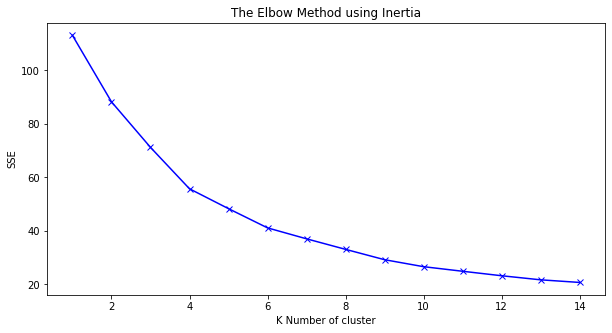

In [184]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data= X
sse = {} #sum of squared errors
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure(figsize=(10,5))
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("K Number of cluster")
plt.ylabel("SSE")
plt.title('The Elbow Method using Inertia')
plt.show()

## Silhouette Method

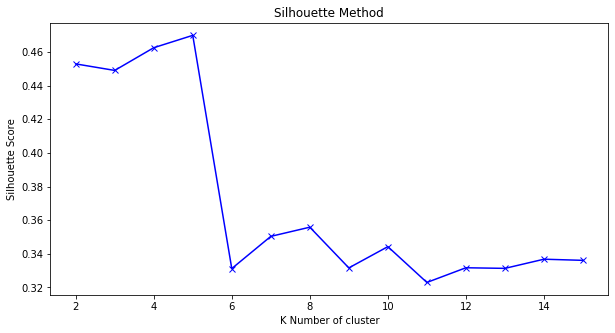

In [185]:
from sklearn.metrics import silhouette_score
data= X
sil = []
kmax = 15
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(data)
  labels = kmeans.labels_
  sil.append([k,silhouette_score(data, labels, metric = 'euclidean')])


df_sil= pd.DataFrame(sil, columns=['K','Silhouette Score'])
plt.figure(figsize=(10,5))
plt.plot(df_sil['K'], df_sil['Silhouette Score'], 'bx-')
plt.xlabel("K Number of cluster")
plt.ylabel("Silhouette Score")
plt.title('Silhouette Method')
plt.show()

In [186]:
df_sil

,K,Silhouette Score
0,2,0.452908
1,3,0.449029
2,4,0.462525
3,5,0.469877
4,6,0.331234
5,7,0.350376
6,8,0.355836
7,9,0.331630
8,10,0.344271
9,11,0.322985


## Clustering Model Fitting

In [187]:
km = KMeans(n_clusters = 5, n_jobs = 4, random_state=21)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [188]:
X['cluster']=km.labels_
X.head(3)

,payload,mou_voice_onnet,mou_voice_offnet,trx_sms_onnet,cluster
0,0.082242,0.001003,0.004667,0.006427,1
1,0.048026,0.003231,0.042007,0.002571,1
2,0.172319,0.002340,0.030338,0.000000,0


## Calculate Dunn Index

In [189]:
# pip install git+https://github.com/jqmviegas/jqm_cvi

In [190]:
# from jqmcvi import base 
# # We store the clusters 
# clus0 = X.loc[X.cluster == 0] 
# clus1 = X.loc[X.cluster == 1] 
# clus2 = X.loc[X.cluster == 2] 
# clus3 = X.loc[X.cluster == 3]
# clus4 = X.loc[X.cluster == 4] 
# cluster_list = [clus0.values, clus1.values, clus2.values, clus3.values, clus4.values]
  
# print(base.dunn(cluster_list)) 

## Map MSISDN with associated clusters

In [191]:
df_predicted_Taker_clustered = pd.concat([df_predicted_Taker.reset_index(drop=True), X[['cluster']].reset_index(drop=True)], axis='columns')
print(df_predicted_Taker_clustered.shape)
df_predicted_Taker_clustered.head(5)

(14718, 33)


,msisdn,flag_taker,los,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,...,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region,first_rank_category,total_recharge,ojol,flag_taker_predicted,cluster
0,6281211557346,0,223.0,1,145001,0,1050,140601,0,0,...,3,18163348,0,0,05.Central Jabotabek,eCommerce,145000,Y,1,1
1,6281212000076,0,1178.0,1,75000,0,0,75000,0,0,...,0,10606713,0,0,04.Western Jabotabek,Transportation,75000,Y,1,1
2,6281215077304,0,433.0,1,154650,0,0,154650,0,0,...,0,38056924,0,0,08.Jateng,Video,150000,Y,1,0
3,6281215548289,0,792.0,1,150000,0,0,150000,0,0,...,0,16475692,0,0,06.Eastern Jabotabek,News_Lifestyle,150000,Y,1,1
4,6281217414732,0,797.0,1,106868,7448,0,94000,0,0,...,0,17151496,0,0,09.Jatim,Sports,100000,Y,1,1


## Quick look on clustered data

### Pair plot

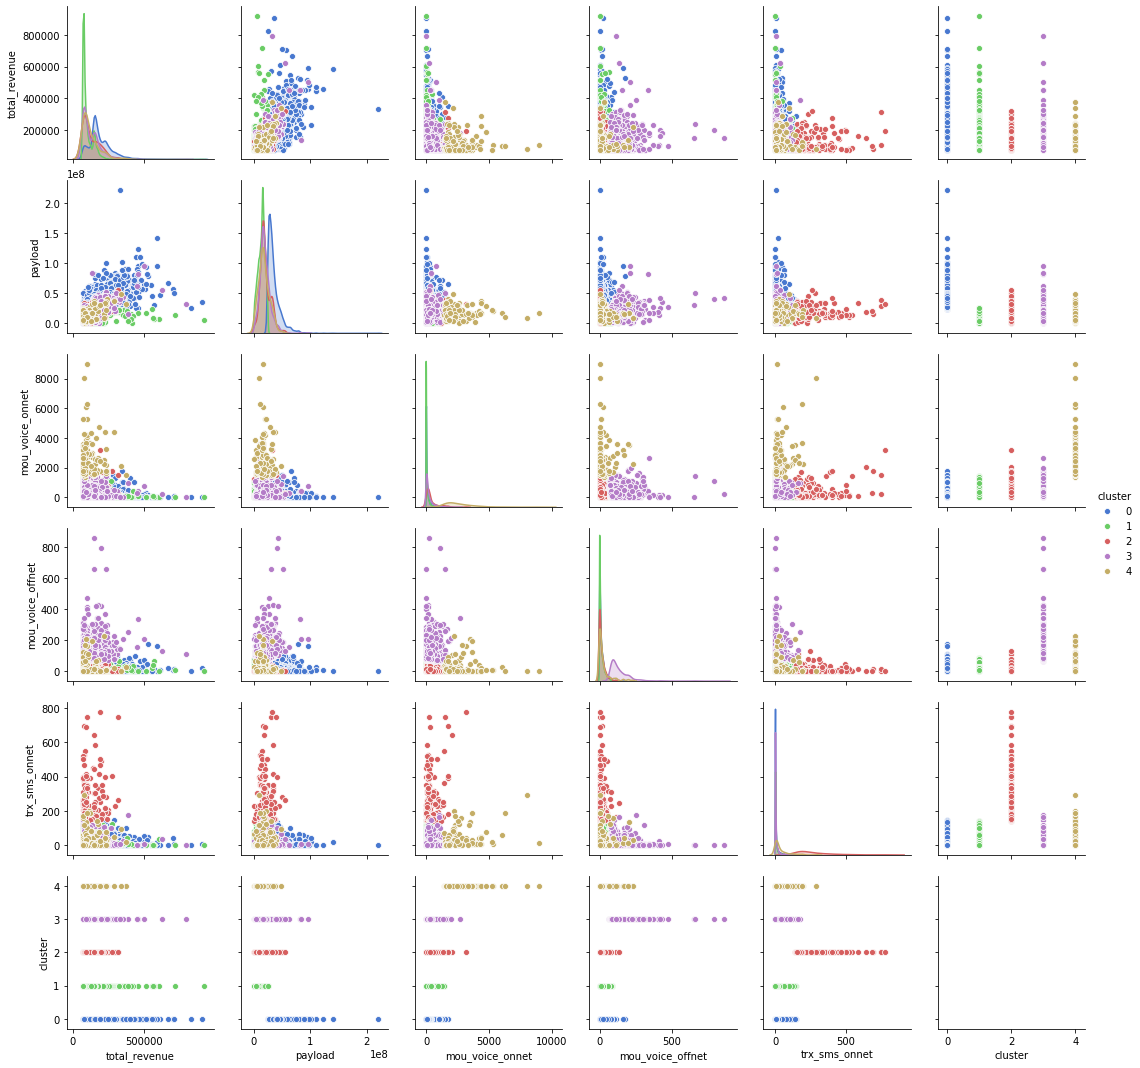

In [192]:
df_predicted_Taker_clustered_selected = df_predicted_Taker_clustered.loc[:,['total_revenue','payload','mou_voice_onnet','mou_voice_offnet','trx_sms_onnet','cluster']]
sns.pairplot(data=df_predicted_Taker_clustered_selected.reset_index(drop=True),hue='cluster')
plt.show()

### Statistic Tables

In [193]:
count_per_cluster = df_predicted_Taker_clustered_selected.groupby('cluster')['total_revenue'].count().reset_index(name='count')
count_per_cluster.set_index(['cluster'], inplace=True)
count_per_cluster.columns=[['msisdn'],['count']]
statistic_per_cluster = df_predicted_Taker_clustered_selected.groupby('cluster').aggregate(['min','mean','max'])
pd.concat([count_per_cluster,statistic_per_cluster],axis='columns')

msisdn total_revenue                          payload                \
         count           min           mean     max       min          mean   
cluster                                                                       
0         2898         75000  192955.075224  906711  24463704  3.604641e+07   
1        10789         75000  102995.554083  918548         0  1.383971e+07   
2          137         75000  128345.109489  315886     31217  2.036955e+07   
3          796         75000  129341.732412  794370    937274  2.006931e+07   
4           98         75000  124053.479592  374350         0  1.821643e+07   

                   mou_voice_onnet                    mou_voice_offnet  \
               max             min         mean   max              min   
cluster                                                                  
0        220851840               0   108.180124  1744                0   
1         25048828               0    88.768097  1440                0   
2         55240960               0   407.890511  3165                0   
3         95442816               0   240.125628  2679               68   
4         48971304            1391  2725.714286  8976                0   

                         trx_sms_onnet                   
               mean  max           min        mean  max  
cluster                                                  
0         15.205659  174             0    7.129400  147  
1         12.399110   86             0    5.452405  143  
2         15.364964  133           140  277.693431  778  
3        138.925879  857             0    8.394472  178  
4         28.489796  229             0   38.459184  291

### Boxplot

In [194]:
df_predicted_Taker_clustered_selected_melt = df_predicted_Taker_clustered_selected.melt(id_vars=['cluster'])
df_predicted_Taker_clustered_selected_melt.head(3)

,cluster,variable,value
0,1,total_revenue,145001
1,1,total_revenue,75000
2,0,total_revenue,154650


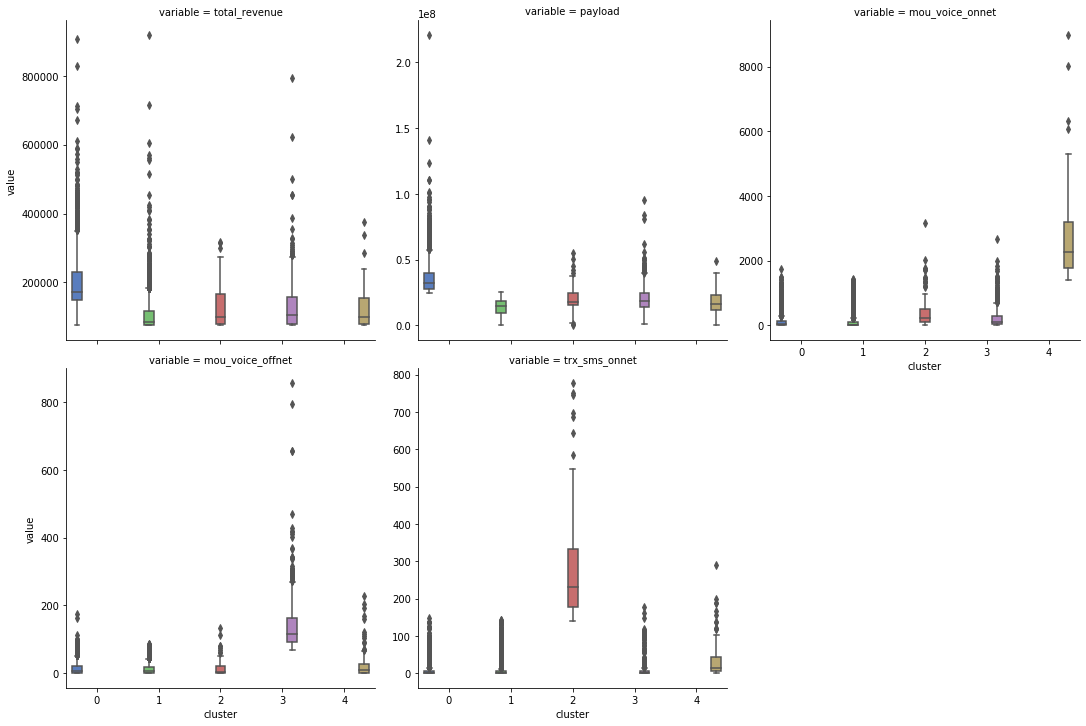

In [195]:
g = sns.FacetGrid(df_predicted_Taker_clustered_selected_melt,height=5, aspect=1, col='variable',sharey=False, col_wrap=3)
g = g.map_dataframe(sns.boxplot, x="cluster", y="value",hue='cluster', palette=sns.color_palette()) 
g.set_xlabels("cluster")
g.set_ylabels("value")
g.fig.show()

### Density plot

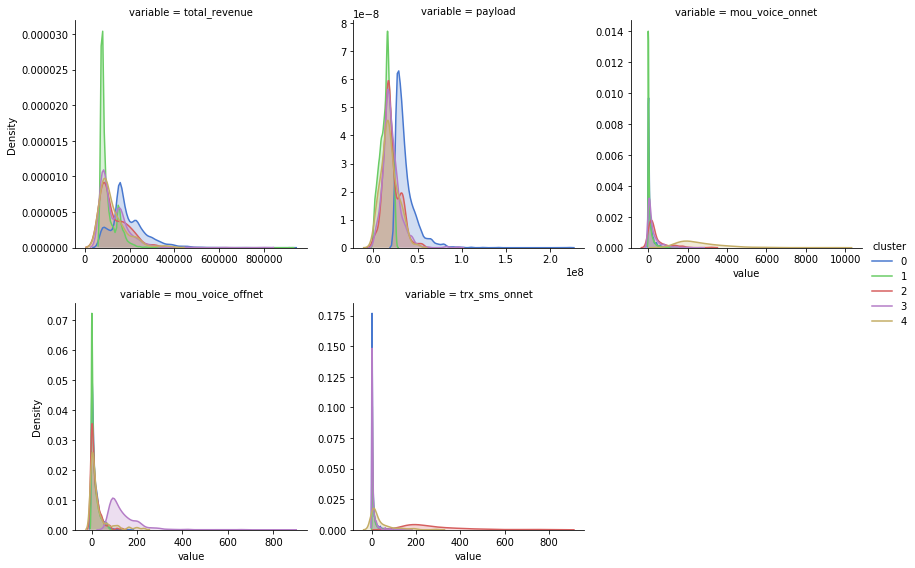

In [196]:
g = sns.FacetGrid(df_predicted_Taker_clustered_selected_melt,height=4, aspect=1, col='variable',sharey=False,sharex=False, col_wrap=3,hue='cluster')
g = g.map(sns.kdeplot, "value", shade=True)
g.add_legend(title="cluster")
g.set_xlabels("value")
g.set_ylabels("Density")
g.fig.show()

# **CLUSTERING** without Scaling

In [148]:
df_predicted_Taker = pd.read_csv('./data_new/df_predicted_Taker_2.1.3.csv', sep='|')

In [149]:
X = df_predicted_Taker.loc[:,['payload','mou_voice_onnet','mou_voice_offnet','trx_sms_onnet']].reset_index(drop=True)
X.head(3)

,payload,mou_voice_onnet,mou_voice_offnet,trx_sms_onnet
0,9004784,2,0,0
1,44127816,177,0,0
2,3673003,0,0,0


## MinMaxScaler (disable)

In [199]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(X)
# X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
# X.head(3)

## Elbow Method

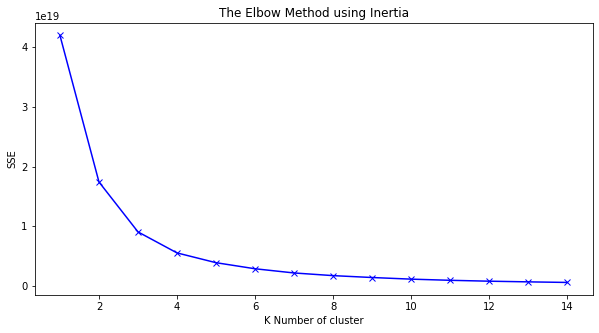

In [150]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data= X
sse = {} #sum of squared errors
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure(figsize=(10,5))
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("K Number of cluster")
plt.ylabel("SSE")
plt.title('The Elbow Method using Inertia')
plt.show()

## Silhouette Method

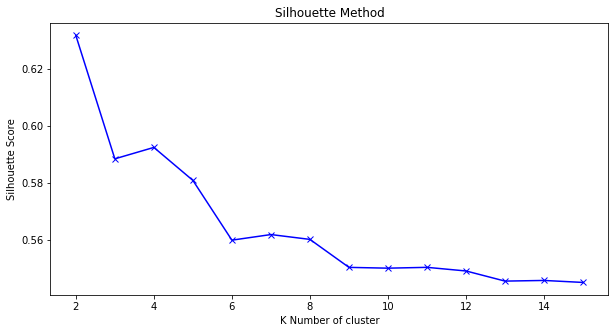

In [151]:
from sklearn.metrics import silhouette_score
data = X
sil = []
kmax = 15
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(data)
    labels = kmeans.labels_
    sil.append([k, silhouette_score(data, labels, metric='euclidean')])


df_sil = pd.DataFrame(sil, columns=['K', 'Silhouette Score'])
plt.figure(figsize=(10, 5))
plt.plot(df_sil['K'], df_sil['Silhouette Score'], 'bx-')
plt.xlabel("K Number of cluster")
plt.ylabel("Silhouette Score")
plt.title('Silhouette Method')
plt.show()

In [152]:
df_sil

,K,Silhouette Score
0,2,0.631621
1,3,0.588363
2,4,0.592360
3,5,0.580809
4,6,0.559873
5,7,0.561832
6,8,0.560139
7,9,0.550336
8,10,0.550057
9,11,0.550347


## Clustering Model Fitting

In [153]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4, n_jobs = 4, random_state=21)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [154]:
X['cluster']=km.labels_
X.head(3)

,payload,mou_voice_onnet,mou_voice_offnet,trx_sms_onnet,cluster
0,9004784,2,0,0,0
1,44127816,177,0,0,1
2,3673003,0,0,0,0


## Calculate Dunn Index

In [205]:
# pip install git+https://github.com/jqmviegas/jqm_cvi

In [206]:
# from jqmcvi import base 
# # We store the clusters 
# clus0 = X.loc[X.cluster == 0] 
# clus1 = X.loc[X.cluster == 1] 
# clus2 = X.loc[X.cluster == 2] 
# clus3 = X.loc[X.cluster == 3]
# clus4 = X.loc[X.cluster == 4] 
# cluster_list = [clus0.values, clus1.values, clus2.values, clus3.values, clus4.values]
  
# print(base.dunn(cluster_list)) 

## Map MSISDN with associated clusters

In [155]:
df_predicted_Taker_clustered = pd.concat([df_predicted_Taker.reset_index(drop=True), X[['cluster']].reset_index(drop=True)], axis='columns')
print(df_predicted_Taker_clustered.shape)
df_predicted_Taker_clustered.head(5)

(255403, 33)


,msisdn,flag_taker,los,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,...,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region,first_rank_category,total_recharge,ojol,flag_taker_predicted,cluster
0,628111006169,0,965.0,1,0,0,0,0,0,0,...,0,9004784,0,0,05.Central Jabotabek,Music,0,Y,1,0
1,628111404401,0,859.0,1,155709,429,0,66000,0,0,...,0,44127816,0,0,06.Eastern Jabotabek,Transportation,0,Y,1,1
2,628111861106,0,1637.0,1,4961,0,0,11,0,0,...,0,3673003,0,0,05.Central Jabotabek,FoodDrinks,0,Y,1,0
3,628112037856,0,2421.0,0,429,429,0,0,0,0,...,0,3012043,0,0,08.Jateng,SocialNet,0,N,1,0
4,62811234581,0,2356.0,1,6039,6039,0,0,0,0,...,0,27418436,0,0,07.Jabar,SocialNet,0,Y,1,1


### Save Predicted Taker Clustered to file

In [156]:
df_predicted_Taker_clustered.to_csv('./data_new/df_predicted_Taker_clustered_2.1.3.csv',index=False, sep='|')

## Quick look on clustered data

In [157]:
df_predicted_Taker_clustered = pd.read_csv('./data_new/df_predicted_Taker_clustered_2.1.3.csv', sep='|')

### Pair plot

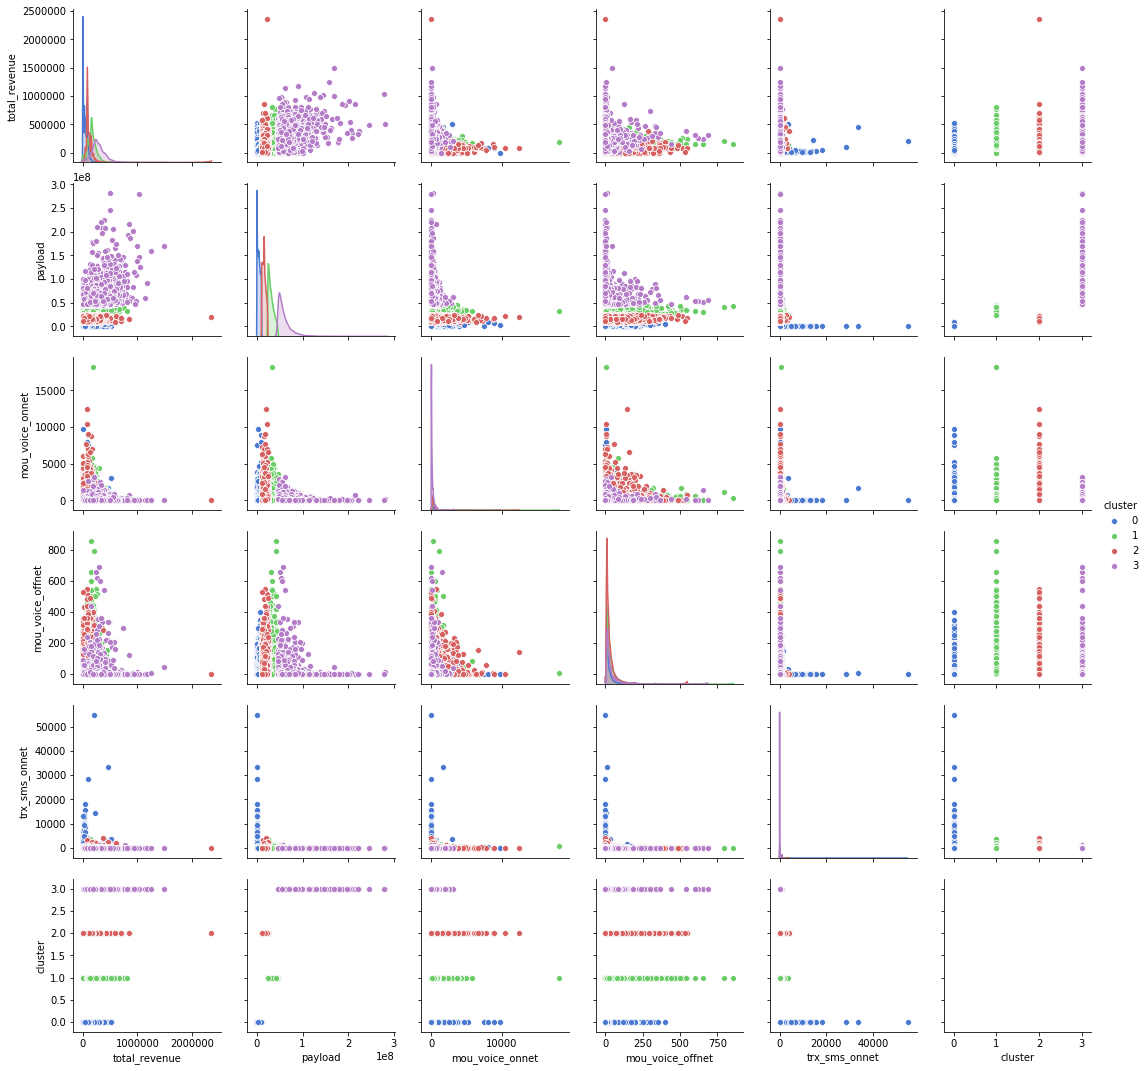

In [158]:
df_predicted_Taker_clustered_selected = df_predicted_Taker_clustered.loc[:,['total_revenue','payload','mou_voice_onnet','mou_voice_offnet','trx_sms_onnet','cluster']]
sns.pairplot(data=df_predicted_Taker_clustered_selected.reset_index(drop=True),hue='cluster')
plt.show()

### Statistic Tables

In [159]:
count_per_cluster = df_predicted_Taker_clustered_selected.groupby('cluster')['total_revenue'].count().reset_index(name='count')
count_per_cluster.set_index(['cluster'], inplace=True)
count_per_cluster.columns=[['msisdn'],['count']]
statistic_per_cluster = df_predicted_Taker_clustered_selected.groupby('cluster').aggregate(['min','mean','max'])
statistic_per_cluster = pd.concat([count_per_cluster,statistic_per_cluster],axis='columns')

In [160]:
statistic_per_cluster

msisdn total_revenue                           payload                \
          count           min           mean      max       min          mean   
cluster                                                                         
0        115665             0   43734.482298   519235         0  4.224849e+06   
1         34551             0  168278.879888   805017  23562724  3.126292e+07   
2         98395             0   89337.211098  2350660  10034352  1.583408e+07   
3          6792             0  282703.906949  1493031  45972592  6.061880e+07   

                   mou_voice_onnet                   mou_voice_offnet  \
               max             min       mean    max              min   
cluster                                                                 
0         10034019               0  23.523659   9763                0   
1         45966808               0  97.756100  18155                0   
2         23562376               0  75.578830  12498                0   
3        281128320               0  92.238663   3162                0   

                        trx_sms_onnet                    
              mean  max           min       mean    max  
cluster                                                  
0         2.881062  399             0   9.362538  54790  
1        10.605424  857             0  10.148013   3606  
2        10.465877  550             0   7.666020   4018  
3         7.199352  687             0  10.284894   1122

In [161]:
# Convert paylog KBytes to GBytes
statistic_per_cluster.loc[:, (['payload',], ['min', 'mean','max'])] = statistic_per_cluster.loc[:, (['payload',], ['min', 'mean','max'])]/1024/1024

In [162]:
columns = [('MSISDN','count'),
('Total Revenue (Rp)','min'),
('Total Revenue (Rp)','mean'),
('Total Revenue (Rp)','max'),
('Payload (GB)','min'),
('Payload (GB)','mean'),
('Payload (GB)','max'),
('MoU Voice Onnet','min'),
('MoU Voice Onnet','mean'),
('MoU Voice Onnet','max'),
('MoU Voice Offnet','min'),
('MoU Voice Offnet','mean'),
('MoU Voice Offnet','max'),
('Trx SMS Onnet','min'),
('Trx SMS Onnet','mean'),
('Trx SMS Onnet','max')]
statistic_per_cluster.columns = pd.MultiIndex.from_tuples(columns)

In [163]:
statistic_per_cluster

MSISDN Total Revenue (Rp)                         Payload (GB)  \
          count                min           mean      max          min   
cluster                                                                   
0        115665                  0   43734.482298   519235     0.000000   
1         34551                  0  168278.879888   805017    22.471165   
2         98395                  0   89337.211098  2350660     9.569504   
3          6792                  0  282703.906949  1493031    43.842880   

                               MoU Voice Onnet                    \
              mean         max             min       mean    max   
cluster                                                            
0         4.029130    9.569186               0  23.523659   9763   
1        29.814648   43.837364               0  97.756100  18155   
2        15.100558   22.470833               0  75.578830  12498   
3        57.810589  268.104858               0  92.238663   3162   

        MoU Voice Offnet                 Trx SMS Onnet                    
                     min       mean  max           min       mean    max  
cluster                                                                   
0                      0   2.881062  399             0   9.362538  54790  
1                      0  10.605424  857             0  10.148013   3606  
2                      0  10.465877  550             0   7.666020   4018  
3                      0   7.199352  687             0  10.284894   1122

In [164]:
statistic_per_cluster = statistic_per_cluster.sort_values(by=[('Payload (GB)','mean')])

In [165]:
def format_number(x):
    if x.dtype != 'O':
        return x.map('{:,.0f}'.format)
    else: 
        return x

In [166]:
statistic_per_cluster.apply(format_number, axis=0)

MSISDN Total Revenue (Rp)                     Payload (GB)       \
           count                min     mean        max          min mean   
cluster                                                                     
0        115,665                  0   43,734    519,235            0    4   
2         98,395                  0   89,337  2,350,660           10   15   
1         34,551                  0  168,279    805,017           22   30   
3          6,792                  0  282,704  1,493,031           44   58   

             MoU Voice Onnet              MoU Voice Offnet            \
         max             min mean     max              min mean  max   
cluster                                                                
0         10               0   24   9,763                0    3  399   
2         22               0   76  12,498                0   10  550   
1         44               0   98  18,155                0   11  857   
3        268               0   92   3,162                0    7  687   

        Trx SMS Onnet               
                  min mean     max  
cluster                             
0                   0    9  54,790  
2                   0    8   4,018  
1                   0   10   3,606  
3                   0   10   1,122

### Boxplot

In [167]:
df_predicted_Taker_clustered_selected_melt = df_predicted_Taker_clustered_selected.melt(id_vars=['cluster'])
df_predicted_Taker_clustered_selected_melt.head(3)

,cluster,variable,value
0,0,total_revenue,0
1,1,total_revenue,155709
2,0,total_revenue,4961


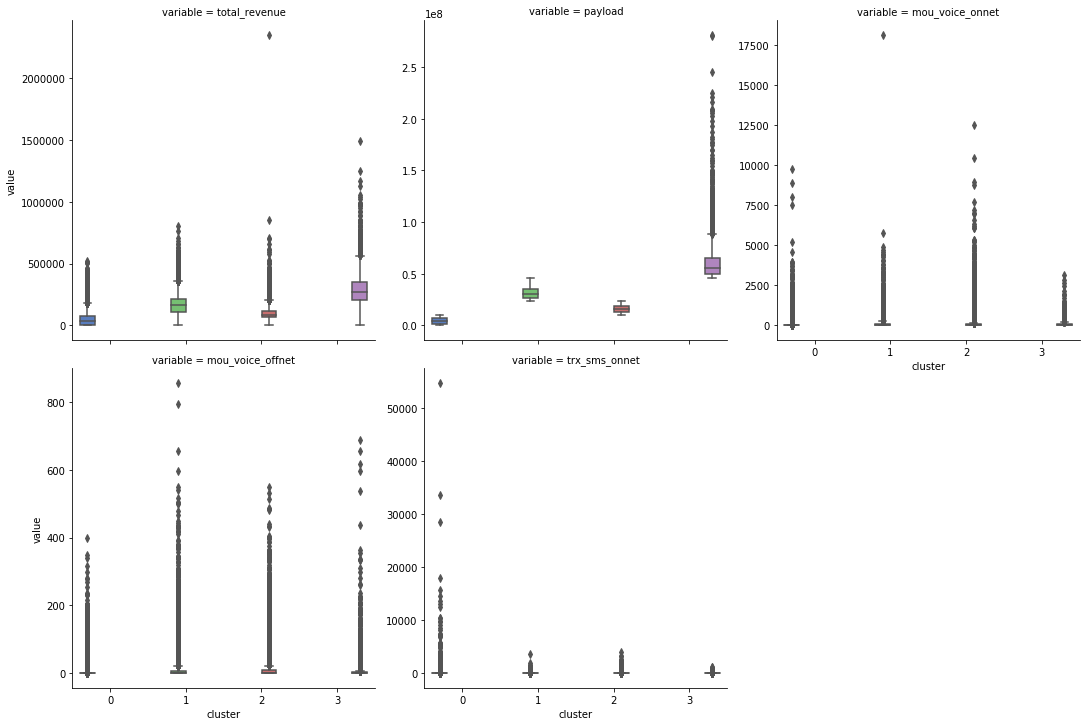

In [168]:
g = sns.FacetGrid(df_predicted_Taker_clustered_selected_melt,height=5, aspect=1, col='variable',sharey=False, col_wrap=3)
g = g.map_dataframe(sns.boxplot, x="cluster", y="value",hue='cluster', palette=sns.color_palette()) 
g.set_xlabels("cluster")
g.set_ylabels("value")
g.fig.show()

### Density plot

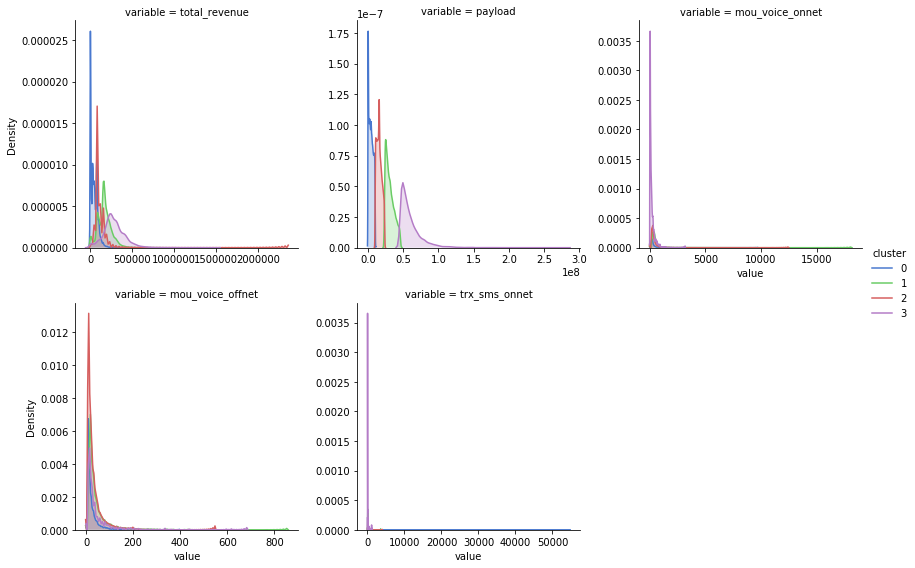

In [169]:
g = sns.FacetGrid(df_predicted_Taker_clustered_selected_melt,height=4, aspect=1, col='variable',sharey=False,sharex=False, col_wrap=3,hue='cluster')
g = g.map(sns.kdeplot, "value", shade=True)
g.add_legend(title="cluster")
g.set_xlabels("value")
g.set_ylabels("Density")
g.fig.show()

In [271]:
df_predicted_Taker_clustered_selected

,total_revenue,payload,mou_voice_onnet,mou_voice_offnet,trx_sms_onnet,cluster,segment,segment_level
0,0,9004784,2,0,0,0,"(-1.0, 15001.0]",L
1,155709,44127816,177,0,0,1,"(146001.0, 191987.0]",M
2,4961,3673003,0,0,0,0,"(-1.0, 15001.0]",L
3,429,3012043,20,0,6,0,"(-1.0, 15001.0]",L
4,6039,27418436,17,2,0,1,"(-1.0, 146001.0]",L
...,...,...,...,...,...,...,...,...
255398,79620,15878912,236,32,1,2,"(75000.0, 101847.0]",M
255399,118500,21312172,115,0,1,2,"(101847.0, 2350660.0]",H
255400,38064,1781305,0,0,0,0,"(15001.0, 60000.0]",M
255401,10000,16776065,13,0,3,2,"(-1.0, 75000.0]",L


### 3D Plot

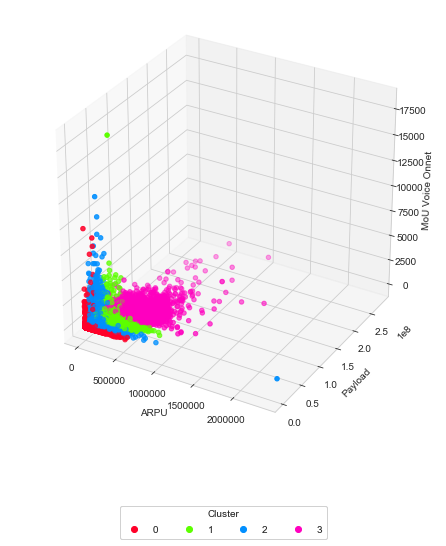

In [292]:
from mpl_toolkits.mplot3d import Axes3D
#sns.set_style("whitegrid", {'axes.grid' : False})
plt.style.use('seaborn-muted')

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)

x = df_predicted_Taker_clustered_selected['total_revenue']
y = df_predicted_Taker_clustered_selected['payload']
z = df_predicted_Taker_clustered_selected['mou_voice_onnet']
cluster = df_predicted_Taker_clustered_selected['cluster']

g = ax.scatter(x, y, z, c=cluster, marker='o', depthshade=True,cmap='gist_rainbow' ) #cmap='Paired'
ax.set_xlabel('ARPU')
ax.set_ylabel('Payload')
ax.set_zlabel('MoU Voice Onnet')

# produce a legend with the unique colors from the scatter
legend = ax.legend(*g.legend_elements(), loc="lower center", title="Cluster", borderaxespad=-10, ncol=4)
ax.add_artist(legend)

plt.show()

### Statistic Table Expanded

In [658]:
df_predicted_Taker_clustered = pd.read_csv('./data_new/df_predicted_Taker_clustered_2.1.3.csv', sep='|')
df_predicted_Taker_clustered_selected = df_predicted_Taker_clustered.loc[:,[
     'los', 'region', 'total_revenue',
       'rev_broadband', 'rev_data_pack',
    'rev_voice','rev_voice_pack',
    'rev_sms','rev_sms_pack', 
        'payload', 'mou_voice','trx_sms','cluster'
]]
df_predicted_Taker_clustered_selected.head(3)

,los,region,total_revenue,rev_broadband,rev_data_pack,rev_voice,rev_voice_pack,rev_sms,rev_sms_pack,payload,mou_voice,trx_sms,cluster
0,965.0,05.Central Jabotabek,0,0,0,0,0,0,0,9004784,2,0,0
1,859.0,06.Eastern Jabotabek,155709,66000,66000,429,0,0,0,44127816,177,0,1
2,1637.0,05.Central Jabotabek,4961,11,11,0,0,0,0,3673003,0,0,0


In [659]:
count_per_cluster = df_predicted_Taker_clustered_selected.groupby(['cluster'])['total_revenue'].count().reset_index(name='count')
count_per_cluster.set_index(['cluster'], inplace=True)
count_per_cluster.columns=[['msisdn'],['count']]

func1 = lambda x : x.value_counts().index[0]
func2 = lambda x : x.value_counts()[0]

statistic_per_cluster = df_predicted_Taker_clustered_selected.groupby(['cluster']).aggregate(
    {
        'payload'       : ['min','mean','max'],
        'total_revenue' : ['min','mean','max'],
        'rev_broadband' : ['min','mean','max'],
        'rev_data_pack' : ['min','mean','max'],
        'rev_voice'     : ['min','mean','max'],
        'rev_voice_pack': ['min','mean','max'],
        'rev_sms'       : ['min','mean','max'],
        'rev_sms_pack'  : ['min','mean','max'],
        'mou_voice'     : ['min','mean','max'],
        'trx_sms'       : ['min','mean','max'],
        'los'           : ['min','mean','max'],
        'region':[func1,func2]
        
    })
statistic_per_cluster = pd.concat([count_per_cluster,statistic_per_cluster],axis='columns')
statistic_per_cluster

msisdn   payload                          total_revenue  \
          count       min          mean        max           min   
cluster                                                            
0        115665         0  4.224849e+06   10034019             0   
1         34551  23562724  3.126292e+07   45966808             0   
2         98395  10034352  1.583408e+07   23562376             0   
3          6792  45972592  6.061880e+07  281128320             0   

                                rev_broadband                          \
                  mean      max           min           mean      max   
cluster                                                                 
0         43734.482298   519235             0   40169.269961   500020   
1        168278.879888   805017             0  157900.236780   805017   
2         89337.211098  2350660             0   83220.681762   825005   
3        282703.906949  1493031             0  263323.964664  1163498   

        rev_data_pack                         rev_voice                       \
                  min           mean      max       min         mean     max   
cluster                                                                        
0                   0   38867.882869   500020         0   310.462275  119258   
1                   0  152366.499783   805017         0  1867.803103   63207   
2                   0   80104.082890   825005         0   804.899273   65954   
3                   0  255094.315960  1103000         0  3906.083922   50000   

        rev_voice_pack                    rev_sms                      \
                   min        mean    max     min        mean     max   
cluster                                                                 
0                    0   22.918247  92000       0  823.444223  343035   
1                    0  219.073920  20001       0  567.743510  212850   
2                    0   85.223568  25000       0  493.544011  327525   
3                    0  579.108510  50000       0  728.486307  146140   

        rev_sms_pack                    mou_voice                    trx_sms  \
                 min       mean     max       min        mean    max     min   
cluster                                                                        
0                  0  61.867549  239320         0   27.213937   9768       0   
1                  0  15.373795   55250         0  111.381928  18161       0   
2                  0  12.837492  100750         0   88.722953  12642       0   
3                  0  15.755300   50000         0  101.928740   3203       0   

                           los                                     region  \
              mean    max  min         mean     max            <lambda_0>   
cluster                                                                     
0        11.544504  54819  0.0   980.577919  8985.0  05.Central Jabotabek   
1        11.993575   3634  0.0  1265.892970  8985.0  05.Central Jabotabek   
2         9.170375   4050  0.0  1234.335342  8985.0  05.Central Jabotabek   
3        12.304623   1125  1.0  1295.800942  8985.0  05.Central Jabotabek   

                    
        <lambda_1>  
cluster             
0            25257  
1             6787  
2            20385  
3             1211

In [660]:
# Convert paylog KBytes to GBytes
statistic_per_cluster.loc[:, (['payload'], ['min', 'mean','max'])] = statistic_per_cluster.loc[:, (['payload'], ['min', 'mean','max'])]/1024/1024
# Convert los days to month
#statistic_per_segment.loc[:, (['los'], ['min', 'mean','max'])] = statistic_per_segment.loc[:, (['los'], ['min', 'mean','max'])]/30


In [661]:

columns = [('MSISDN','count'),
('Payload (GB)','min'),
('Payload (GB)','mean'),
('Payload (GB)','max'),
('Total Revenue (Rp)','min'),
('Total Revenue (Rp)','mean'),
('Total Revenue (Rp)','max'),
('Revenue Broadband (Rp)','min'),
('Revenue Broadband (Rp)','mean'),
('Revenue Broadband (Rp)','max'),
('Revenue DataPack (Rp)','min'),
('Revenue DataPack (Rp)','mean'),
('Revenue DataPack (Rp)','max'),
('Revenue Voice (Rp)','min'),
('Revenue Voice (Rp)','mean'),
('Revenue Voice (Rp)','max'),
('Revenue VoicePack (Rp)','min'),
('Revenue VoicePack (Rp)','mean'),
('Revenue VoicePack (Rp)','max'),
('Revenue SMS (Rp)','min'),
('Revenue SMS (Rp)','mean'),
('Revenue SMS (Rp)','max'),
('Revenue SMSPack (Rp)','min'),
('Revenue SMSPack (Rp)','mean'),
('Revenue SMSPack (Rp)','max'),
('MoU Voice','min'),
('MoU Voice','mean'),
('MoU Voice','max'),
('Trx SMS','min'),
('Trx SMS','mean'),
('Trx SMS','max'),
('LoS (Days)','min'),
('LoS (Days)','mean'),
('LoS (Days)','max'),
('Region','dominant'),
('Region','#MSISDN')]
statistic_per_cluster.columns = pd.MultiIndex.from_tuples(columns)
statistic_per_cluster

MSISDN Payload (GB)                        Total Revenue (Rp)  \
          count          min       mean         max                min   
cluster                                                                  
0        115665     0.000000   4.029130    9.569186                  0   
1         34551    22.471165  29.814648   43.837364                  0   
2         98395     9.569504  15.100558   22.470833                  0   
3          6792    43.842880  57.810589  268.104858                  0   

                                Revenue Broadband (Rp)                 \
                  mean      max                    min           mean   
cluster                                                                 
0         43734.482298   519235                      0   40169.269961   
1        168278.879888   805017                      0  157900.236780   
2         89337.211098  2350660                      0   83220.681762   
3        282703.906949  1493031                      0  263323.964664   

                 Revenue DataPack (Rp)                          \
             max                   min           mean      max   
cluster                                                          
0         500020                     0   38867.882869   500020   
1         805017                     0  152366.499783   805017   
2         825005                     0   80104.082890   825005   
3        1163498                     0  255094.315960  1103000   

        Revenue Voice (Rp)                      Revenue VoicePack (Rp)  \
                       min         mean     max                    min   
cluster                                                                  
0                        0   310.462275  119258                      0   
1                        0  1867.803103   63207                      0   
2                        0   804.899273   65954                      0   
3                        0  3906.083922   50000                      0   

                           Revenue SMS (Rp)                      \
               mean    max              min        mean     max   
cluster                                                           
0         22.918247  92000                0  823.444223  343035   
1        219.073920  20001                0  567.743510  212850   
2         85.223568  25000                0  493.544011  327525   
3        579.108510  50000                0  728.486307  146140   

        Revenue SMSPack (Rp)                    MoU Voice                     \
                         min       mean     max       min        mean    max   
cluster                                                                        
0                          0  61.867549  239320         0   27.213937   9768   
1                          0  15.373795   55250         0  111.381928  18161   
2                          0  12.837492  100750         0   88.722953  12642   
3                          0  15.755300   50000         0  101.928740   3203   

        Trx SMS                   LoS (Days)                       \
            min       mean    max        min         mean     max   
cluster                                                             
0             0  11.544504  54819        0.0   980.577919  8985.0   
1             0  11.993575   3634        0.0  1265.892970  8985.0   
2             0   9.170375   4050        0.0  1234.335342  8985.0   
3             0  12.304623   1125        1.0  1295.800942  8985.0   

                       Region          
                     dominant #MSISDN  
cluster                                
0        05.Central Jabotabek   25257  
1        05.Central Jabotabek    6787  
2        05.Central Jabotabek   20385  
3        05.Central Jabotabek    1211

In [662]:
def format_number(x):
    if x.dtype != 'O':
        return x.map('{:,.0f}'.format)
    else: 
        return x

In [664]:
x = statistic_per_cluster.reset_index().sort_values(by=['cluster'])
sorter = [0,2,1,3]
x['cluster'] = pd.Categorical(x['cluster'], categories=sorter, ordered=True)
x = x.sort_values(by=['cluster'])

In [666]:
x['cluster'] = x['cluster'].astype(str)

In [667]:
x.apply(format_number, axis=0)

cluster   MSISDN Payload (GB)           Total Revenue (Rp)           \
             count          min mean  max                min     mean   
0       0  115,665            0    4   10                  0   43,734   
2       2   98,395           10   15   22                  0   89,337   
1       1   34,551           22   30   44                  0  168,279   
3       3    6,792           44   58  268                  0  282,704   

             Revenue Broadband (Rp)                     Revenue DataPack (Rp)  \
         max                    min     mean        max                   min   
0    519,235                      0   40,169    500,020                     0   
2  2,350,660                      0   83,221    825,005                     0   
1    805,017                      0  157,900    805,017                     0   
3  1,493,031                      0  263,324  1,163,498                     0   

                      Revenue Voice (Rp)                  \
      mean        max                min   mean      max   
0   38,868    500,020                  0    310  119,258   
2   80,104    825,005                  0    805   65,954   
1  152,366    805,017                  0  1,868   63,207   
3  255,094  1,103,000                  0  3,906   50,000   

  Revenue VoicePack (Rp)              Revenue SMS (Rp)                \
                     min mean     max              min mean      max   
0                      0   23  92,000                0  823  343,035   
2                      0   85  25,000                0  494  327,525   
1                      0  219  20,001                0  568  212,850   
3                      0  579  50,000                0  728  146,140   

  Revenue SMSPack (Rp)               MoU Voice              Trx SMS       \
                   min mean      max       min mean     max     min mean   
0                    0   62  239,320         0   27   9,768       0   12   
2                    0   13  100,750         0   89  12,642       0    9   
1                    0   15   55,250         0  111  18,161       0   12   
3                    0   16   50,000         0  102   3,203       0   12   

          LoS (Days)                              Region          
      max        min   mean    max              dominant #MSISDN  
0  54,819          0    981  8,985  05.Central Jabotabek  25,257  
2   4,050          0  1,234  8,985  05.Central Jabotabek  20,385  
1   3,634          0  1,266  8,985  05.Central Jabotabek   6,787  
3   1,125          1  1,296  8,985  05.Central Jabotabek   1,211

# **SEGMENTATION**

In [293]:
df_predicted_Taker_clustered = pd.read_csv('./data_new/df_predicted_Taker_clustered_2.1.3.csv', sep='|')
print(df_predicted_Taker_clustered.shape)
df_predicted_Taker_clustered.head(3)

(255403, 33)


,msisdn,flag_taker,los,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,...,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region,first_rank_category,total_recharge,ojol,flag_taker_predicted,cluster
0,628111006169,0,965.0,1,0,0,0,0,0,0,...,0,9004784,0,0,05.Central Jabotabek,Music,0,Y,1,0
1,628111404401,0,859.0,1,155709,429,0,66000,0,0,...,0,44127816,0,0,06.Eastern Jabotabek,Transportation,0,Y,1,1
2,628111861106,0,1637.0,1,4961,0,0,11,0,0,...,0,3673003,0,0,05.Central Jabotabek,FoodDrinks,0,Y,1,0


In [181]:
df_predicted_Taker_clustered_selected = df_predicted_Taker_clustered.loc[:,['total_revenue','payload','mou_voice_onnet','mou_voice_offnet','trx_sms_onnet','cluster']]

In [182]:
count_per_cluster = df_predicted_Taker_clustered_selected.groupby('cluster')['total_revenue'].count().reset_index(name='count')
count_per_cluster.set_index(['cluster'], inplace=True)
count_per_cluster.columns=[['msisdn'],['count']]
statistic_per_cluster = df_predicted_Taker_clustered_selected.groupby('cluster').aggregate(['min','mean','max'])
statistic_per_cluster = pd.concat([count_per_cluster,statistic_per_cluster],axis='columns')
statistic_per_cluster

msisdn total_revenue                           payload                \
          count           min           mean      max       min          mean   
cluster                                                                         
0        115665             0   43734.482298   519235         0  4.224849e+06   
1         34551             0  168278.879888   805017  23562724  3.126292e+07   
2         98395             0   89337.211098  2350660  10034352  1.583408e+07   
3          6792             0  282703.906949  1493031  45972592  6.061880e+07   

                   mou_voice_onnet                   mou_voice_offnet  \
               max             min       mean    max              min   
cluster                                                                 
0         10034019               0  23.523659   9763                0   
1         45966808               0  97.756100  18155                0   
2         23562376               0  75.578830  12498                0   
3        281128320               0  92.238663   3162                0   

                        trx_sms_onnet                    
              mean  max           min       mean    max  
cluster                                                  
0         2.881062  399             0   9.362538  54790  
1        10.605424  857             0  10.148013   3606  
2        10.465877  550             0   7.666020   4018  
3         7.199352  687             0  10.284894   1122

## Create Segment per Cluster

###  Satistic Table

In [183]:
fn = lambda x: pd.qcut(x,3,labels=None, retbins=False, precision=0)
df_predicted_Taker_clustered_selected['segment']=df_predicted_Taker_clustered_selected.groupby('cluster')['total_revenue'].apply(fn)

In [184]:
fn = lambda x: pd.qcut(x,3,labels=['L','M','H'], retbins=False, precision=0) # 3 is number of bin or quantiles
df_predicted_Taker_clustered_selected['segment_level']=df_predicted_Taker_clustered_selected.groupby('cluster')['total_revenue'].apply(fn)

In [185]:
count_per_segment = df_predicted_Taker_clustered_selected.groupby(['cluster','segment_level'])['total_revenue'].count().reset_index(name='count')
count_per_segment.set_index(['cluster','segment_level'], inplace=True)
count_per_segment.columns=[['msisdn'],['count']]
statistic_per_segment = df_predicted_Taker_clustered_selected.groupby(['cluster','segment_level']).aggregate(['min','mean','max'])
statistic_per_segment = pd.concat([count_per_segment,statistic_per_segment],axis='columns')
statistic_per_segment

msisdn total_revenue                           payload  \
                       count           min           mean      max       min   
cluster segment_level                                                          
0       L              38977             0    2437.729558    15001         0   
        M              38284         15002   36925.584108    60000         0   
        H              38404         60001   92435.018436   519235         0   
1       L              11517             0   84463.918642   146000  23562900   
        M              11517        146002  165013.028480   191981  23562724   
        H              11517        192000  255359.692541   805017  23562856   
2       L              35388             0   33707.748728    75000  10034352   
        M              30209         75001   85435.360489   101847  10034421   
        H              32798        101850  152953.480974  2350660  10034510   
3       L               2264             0  157096.378534   227430  45979448   
        M               2264        227462  270198.977915   319423  45972592   
        H               2264        319480  420816.364399  1493031  45976800   

                                               mou_voice_onnet              \
                               mean        max             min        mean   
cluster segment_level                                                        
0       L              3.499512e+06   10033226               0   21.351464   
        M              3.360963e+06   10034019               0   12.015333   
        H              5.822196e+06   10034001               0   37.200630   
1       L              2.882833e+07   45951120               0   91.715811   
        M              3.105231e+07   45965360               0  122.776765   
        H              3.390813e+07   45966808               0   78.775723   
2       L              1.457494e+07   23558708               0   72.954448   
        M              1.584671e+07   23561372               0   89.598232   
        H              1.718102e+07   23562376               0   65.497713   
3       L              5.724700e+07  177698640               0   91.870141   
        M              5.655944e+07  209259856               0  112.078180   
        H              6.804995e+07  281128320               0   72.767668   

                             mou_voice_offnet                 trx_sms_onnet  \
                         max              min       mean  max           min   
cluster segment_level                                                         
0       L               9763                0   2.837468  279             0   
        M               2574                0   1.210950  237             0   
        H               8884                0   4.590199  399             0   
1       L               4271                0   9.078232  467             0   
        M              18155                0  13.400972  857             0   
        H               4584                0   9.337067  793             0   
2       L              12498                0  11.029219  550             0   
        M               8976                0  11.566520  514             0   
        H               8799                0   8.844289  488             0   
3       L               3162                0   6.389576  438             0   
        M               2458                0   8.678887  687             0   
        H               2125                0   6.529594  539             0   

                                         
                            mean    max  
cluster segment_level                    
0       L               6.149755  13155  
        M               9.997074  17993  
        H              11.990704  54790  
1       L               9.545107   3606  
        M              10.472085   1940  
        H              10.426847   1334  
2       L               6.238584   3347  
        M               7.868185   3241  
  

In [186]:
# Convert paylog KBytes to GBytes
statistic_per_segment.loc[:, (['payload',], ['min', 'mean','max'])] = statistic_per_segment.loc[:, (['payload',], ['min', 'mean','max'])]/1024/1024

In [187]:
columns = [('MSISDN','count'),
('Total Revenue (Rp)','min'),
('Total Revenue (Rp)','mean'),
('Total Revenue (Rp)','max'),
('Payload (GB)','min'),
('Payload (GB)','mean'),
('Payload (GB)','max'),
('MoU Voice Onnet','min'),
('MoU Voice Onnet','mean'),
('MoU Voice Onnet','max'),
('MoU Voice Offnet','min'),
('MoU Voice Offnet','mean'),
('MoU Voice Offnet','max'),
('Trx SMS Onnet','min'),
('Trx SMS Onnet','mean'),
('Trx SMS Onnet','max')]
statistic_per_segment.columns = pd.MultiIndex.from_tuples(columns)
statistic_per_segment

MSISDN Total Revenue (Rp)                          \
                       count                min           mean      max   
cluster segment_level                                                     
0       L              38977                  0    2437.729558    15001   
        M              38284              15002   36925.584108    60000   
        H              38404              60001   92435.018436   519235   
1       L              11517                  0   84463.918642   146000   
        M              11517             146002  165013.028480   191981   
        H              11517             192000  255359.692541   805017   
2       L              35388                  0   33707.748728    75000   
        M              30209              75001   85435.360489   101847   
        H              32798             101850  152953.480974  2350660   
3       L               2264                  0  157096.378534   227430   
        M               2264             227462  270198.977915   319423   
        H               2264             319480  420816.364399  1493031   

                      Payload (GB)                        MoU Voice Onnet  \
                               min       mean         max             min   
cluster segment_level                                                       
0       L                 0.000000   3.337395    9.568430               0   
        M                 0.000000   3.205264    9.569186               0   
        H                 0.000000   5.552478    9.569169               0   
1       L                22.471333  27.492841   43.822403               0   
        M                22.471165  29.613793   43.835983               0   
        H                22.471291  32.337308   43.837364               0   
2       L                 9.569504  13.899751   22.467335               0   
        M                 9.569570  15.112605   22.469875               0   
        H                 9.569654  16.385096   22.470833               0   
3       L                43.849419  54.594991  169.466629               0   
        M                43.842880  53.939285  199.565750               0   
        H                43.846893  64.897492  268.104858               0   

                                         MoU Voice Offnet                  \
                             mean    max              min       mean  max   
cluster segment_level                                                       
0       L               21.351464   9763                0   2.837468  279   
        M               12.015333   2574                0   1.210950  237   
        H               37.200630   8884                0   4.590199  399   
1       L               91.715811   4271                0   9.078232  467   
        M              122.776765  18155                0  13.400972  857   
        H               78.775723   4584                0   9.337067  793   
2       L               72.954448  12498                0  11.029219  550   
        M               89.598232   8976                0  11.566520  514   
        H               65.497713   8799                0   8.844289  488   
3       L               91.870141   3162                0   6.389576  438   
        M              112.078180   2458                0   8.678887  687   
        H               72.767668   2125                0   6.529594  539   

                      Trx SMS Onnet                    
                                min       mean    max  
cluster segment_level                                  
0       L                         0   6.149755  13155  
        M                         0   9.997074  17993  
        H                         0  11.990704  54790  
1       L                         0   9.545107   3606  
        M                         0  10.472085   1940  
        H                         0  10.426847   1334  
2       L                         0   6.238584   3347  
        M               

In [188]:
def format_number(x):
    if x.dtype != 'O':
        return x.map('{:,.0f}'.format)
    else: 
        return x

In [189]:

x = statistic_per_segment.reset_index().sort_values(by=['cluster','segment_level'])
sorter = [0,2,1,3]
x['cluster'] = x['cluster'].astype('category')
not_in_list = x['cluster'].cat.categories.difference(sorter)
x['cluster'] = x['cluster'].cat.set_categories(np.hstack((sorter, not_in_list)), ordered=True)

x = x.sort_values('cluster')
x.reset_index(drop=True)

cluster segment_level MSISDN Total Revenue (Rp)                          \
                          count                min           mean      max   
0        0             L  38977                  0    2437.729558    15001   
1        0             M  38284              15002   36925.584108    60000   
2        0             H  38404              60001   92435.018436   519235   
3        2             L  35388                  0   33707.748728    75000   
4        2             M  30209              75001   85435.360489   101847   
5        2             H  32798             101850  152953.480974  2350660   
6        1             L  11517                  0   84463.918642   146000   
7        1             M  11517             146002  165013.028480   191981   
8        1             H  11517             192000  255359.692541   805017   
9        3             L   2264                  0  157096.378534   227430   
10       3             M   2264             227462  270198.977915   319423   
11       3             H   2264             319480  420816.364399  1493031   

   Payload (GB)                        MoU Voice Onnet                     \
            min       mean         max             min        mean    max   
0      0.000000   3.337395    9.568430               0   21.351464   9763   
1      0.000000   3.205264    9.569186               0   12.015333   2574   
2      0.000000   5.552478    9.569169               0   37.200630   8884   
3      9.569504  13.899751   22.467335               0   72.954448  12498   
4      9.569570  15.112605   22.469875               0   89.598232   8976   
5      9.569654  16.385096   22.470833               0   65.497713   8799   
6     22.471333  27.492841   43.822403               0   91.715811   4271   
7     22.471165  29.613793   43.835983               0  122.776765  18155   
8     22.471291  32.337308   43.837364               0   78.775723   4584   
9     43.849419  54.594991  169.466629               0   91.870141   3162   
10    43.842880  53.939285  199.565750               0  112.078180   2458   
11    43.846893  64.897492  268.104858               0   72.767668   2125   

   MoU Voice Offnet                 Trx SMS Onnet                    
                min       mean  max           min       mean    max  
0                 0   2.837468  279             0   6.149755  13155  
1                 0   1.210950  237             0   9.997074  17993  
2                 0   4.590199  399             0  11.990704  54790  
3                 0  11.029219  550             0   6.238584   3347  
4                 0  11.566520  514             0   7.868185   3241  
5                 0   8.844289  488             0   9.019971   4018  
6                 0   9.078232  467             0   9.545107   3606  
7                 0  13.400972  857             0  10.472085   1940  
8                 0   9.337067  793             0  10.426847   1334  
9                 0   6.389576  438             0   9.693905    934  
10                0   8.678887  687             0  11.570671   1110  
11                0   6.529594  539             0   9.590106   1122

In [190]:
x['cluster'] = x['cluster'].astype(str)
x['segment_level'] = x['segment_level'].astype(str)

In [191]:
x.apply(format_number, axis=0)

cluster segment_level  MSISDN Total Revenue (Rp)                      \
                           count                min     mean        max   
0        0             L  38,977                  0    2,438     15,001   
1        0             M  38,284             15,002   36,926     60,000   
2        0             H  38,404             60,001   92,435    519,235   
6        2             L  35,388                  0   33,708     75,000   
7        2             M  30,209             75,001   85,435    101,847   
8        2             H  32,798            101,850  152,953  2,350,660   
3        1             L  11,517                  0   84,464    146,000   
4        1             M  11,517            146,002  165,013    191,981   
5        1             H  11,517            192,000  255,360    805,017   
9        3             L   2,264                  0  157,096    227,430   
10       3             M   2,264            227,462  270,199    319,423   
11       3             H   2,264            319,480  420,816  1,493,031   

   Payload (GB)           MoU Voice Onnet              MoU Voice Offnet       \
            min mean  max             min mean     max              min mean   
0             0    3   10               0   21   9,763                0    3   
1             0    3   10               0   12   2,574                0    1   
2             0    6   10               0   37   8,884                0    5   
6            10   14   22               0   73  12,498                0   11   
7            10   15   22               0   90   8,976                0   12   
8            10   16   22               0   65   8,799                0    9   
3            22   27   44               0   92   4,271                0    9   
4            22   30   44               0  123  18,155                0   13   
5            22   32   44               0   79   4,584                0    9   
9            44   55  169               0   92   3,162                0    6   
10           44   54  200               0  112   2,458                0    9   
11           44   65  268               0   73   2,125                0    7   

        Trx SMS Onnet               
    max           min mean     max  
0   279             0    6  13,155  
1   237             0   10  17,993  
2   399             0   12  54,790  
6   550             0    6   3,347  
7   514             0    8   3,241  
8   488             0    9   4,018  
3   467             0   10   3,606  
4   857             0   10   1,940  
5   793             0   10   1,334  
9   438             0   10     934  
10  687             0   12   1,110  
11  539             0   10   1,122

First Use, Reguler Use, Heavy, Dependence, Addict

### Boxplot

In [193]:
df_predicted_Taker_clustered_selected_melt = df_predicted_Taker_clustered_selected.melt(id_vars=['cluster','segment_level','segment'])

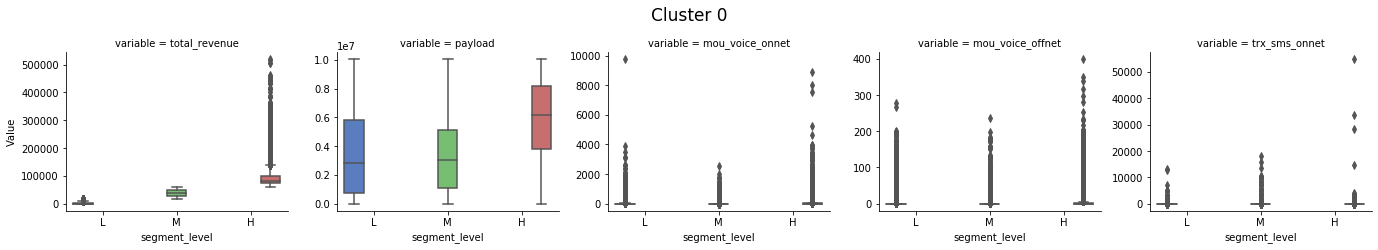

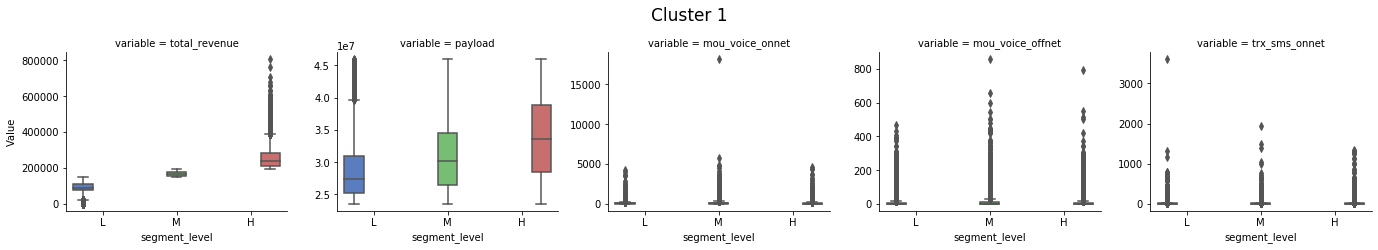

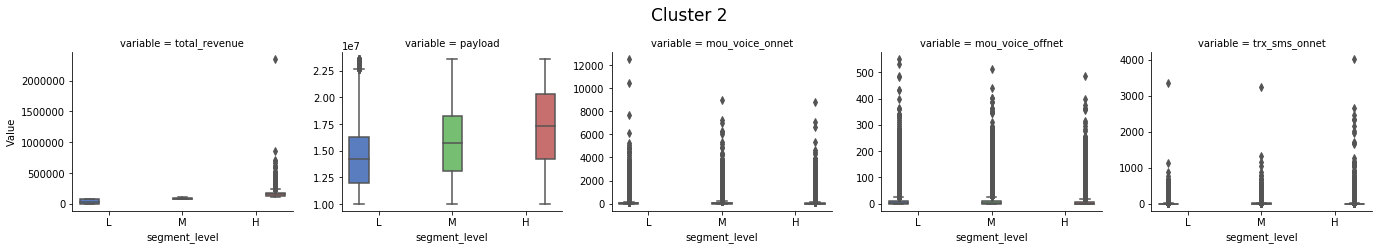

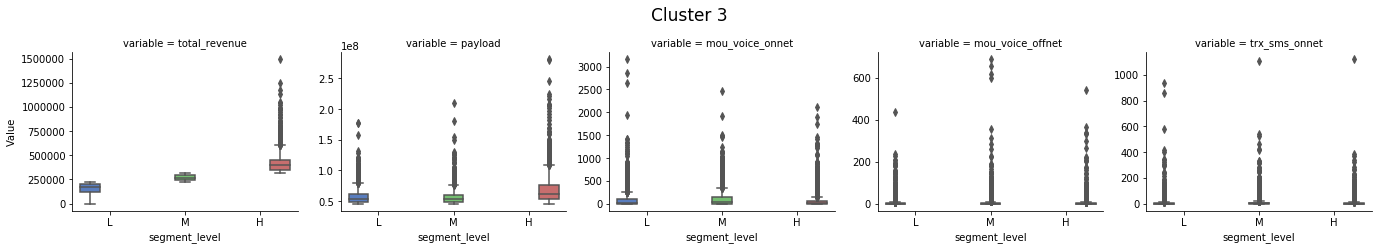

In [194]:
clusters_idx = df_predicted_Taker_clustered_selected_melt['cluster'].sort_values(
).unique()
for cluster_idx in clusters_idx:
    g = sns.catplot(data=df_predicted_Taker_clustered_selected_melt[df_predicted_Taker_clustered_selected_melt['cluster'] == cluster_idx],
                    x="segment_level", y="value", hue="segment_level", col='variable', margin_titles=True, kind="box", height=3.5, aspect=1.1, sharey=False)
    g.set_ylabels("Value")
    g.fig.subplots_adjust(top=0.80)
    g.fig.suptitle("Cluster "+str(cluster_idx), fontsize=17)
    g.fig.show()

## Map MSISDN with associated segments

In [195]:
df_predicted_Taker_clustered_segmented = pd.concat([df_predicted_Taker_clustered.reset_index(drop=True), df_predicted_Taker_clustered_selected[['segment','segment_level']].reset_index(drop=True)], axis='columns')
print(df_predicted_Taker_clustered_segmented.shape)
df_predicted_Taker_clustered_segmented.head(5)

(255403, 35)


,msisdn,flag_taker,los,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,...,total_recharge_mytsel,total_recharge_urp,region,first_rank_category,total_recharge,ojol,flag_taker_predicted,cluster,segment,segment_level
0,628111006169,0,965.0,1,0,0,0,0,0,0,...,0,0,05.Central Jabotabek,Music,0,Y,1,0,"(-1.0, 15001.0]",L
1,628111404401,0,859.0,1,155709,429,0,66000,0,0,...,0,0,06.Eastern Jabotabek,Transportation,0,Y,1,1,"(146001.0, 191987.0]",M
2,628111861106,0,1637.0,1,4961,0,0,11,0,0,...,0,0,05.Central Jabotabek,FoodDrinks,0,Y,1,0,"(-1.0, 15001.0]",L
3,628112037856,0,2421.0,0,429,429,0,0,0,0,...,0,0,08.Jateng,SocialNet,0,N,1,0,"(-1.0, 15001.0]",L
4,62811234581,0,2356.0,1,6039,6039,0,0,0,0,...,0,0,07.Jabar,SocialNet,0,Y,1,1,"(-1.0, 146001.0]",L


### Save Predicted Taker Clustered Segmented to file

In [196]:
df_predicted_Taker_clustered_segmented.to_csv('./data_new/df_predicted_Taker_clustered_segmented_2.1.3.csv',index=False, sep='|')

In [197]:
df_predicted_Taker_clustered_segmented = pd.read_csv('./data_new/df_predicted_Taker_clustered_segmented_2.1.3.csv', sep='|')

# SEGMENTATION by user defined ARPU Bin

In [511]:
df_predicted_Taker_clustered = pd.read_csv('./data_new/df_predicted_Taker_clustered_2.1.3.csv', sep='|')
print(df_predicted_Taker_clustered.shape)
df_predicted_Taker_clustered.head(3)


(255403, 33)


,msisdn,flag_taker,los,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,rev_voice_pack_mytsel,rev_sms_pack_mytsel,rev_data_pack_mytsel,trx_voice,trx_voice_onnet,trx_voice_offnet,mou_voice,mou_voice_onnet,mou_voice_offnet,trx_sms,trx_sms_onnet,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region,first_rank_category,total_recharge,ojol,flag_taker_predicted,cluster
0,628111006169,0,965.0,1,0,0,0,0,0,0,0,0,0,0,0,5,5,0,2,2,0,0,0,0,9004784,0,0,05.Central Jabotabek,Music,0,Y,1,0
1,628111404401,0,859.0,1,155709,429,0,66000,0,0,66000,0,0,0,0,38,37,1,177,177,0,0,0,0,44127816,0,0,06.Eastern Jabotabek,Transportation,0,Y,1,1
2,628111861106,0,1637.0,1,4961,0,0,11,0,0,11,0,0,0,0,2,2,0,0,0,0,0,0,0,3673003,0,0,05.Central Jabotabek,FoodDrinks,0,Y,1,0


In [505]:
df_predicted_Taker_clustered.columns

Index(['msisdn', 'flag_taker', 'los', 'mytsel_app_user', 'total_revenue',
       'rev_voice', 'rev_sms', 'rev_broadband', 'rev_voice_pack',
       'rev_sms_pack', 'rev_data_pack', 'rev_pack_mytsel',
       'rev_voice_pack_mytsel', 'rev_sms_pack_mytsel', 'rev_data_pack_mytsel',
       'trx_voice', 'trx_voice_onnet', 'trx_voice_offnet', 'mou_voice',
       'mou_voice_onnet', 'mou_voice_offnet', 'trx_sms', 'trx_sms_onnet',
       'trx_sms_offnet', 'payload', 'total_recharge_mytsel',
       'total_recharge_urp', 'region', 'first_rank_category', 'total_recharge',
       'ojol', 'flag_taker_predicted', 'cluster'],
      dtype='object')

In [557]:
df_predicted_Taker_clustered_selected = df_predicted_Taker_clustered.loc[:,[
     'los', 'region', 'total_revenue',
       'rev_broadband', 'rev_data_pack',
    'rev_voice','rev_voice_pack',
    'rev_sms','rev_sms_pack', 
        'payload', 'mou_voice','trx_sms','cluster'
]]

## Create Segment per Cluster

In [558]:
bin = [-1,0,25000,50000,75000,150000,225000,300000,2350661]
bin_label = [bin[i] for i in range(len(bin))]
bin_label = ['0','1-25k','25-50k','50-75k','75-150k','150-225k','225-300k','>300k']
col_bin = pd.cut(df_predicted_Taker_clustered_selected['total_revenue'], bins=bin, labels=bin_label)

In [559]:
df_predicted_Taker_clustered_selected['segment']=col_bin

In [560]:
df_predicted_Taker_clustered_selected['segment']=df_predicted_Taker_clustered_selected['segment'].astype(str)

In [561]:
bin = [-1,0,25000,50000,75000,150000,225000,300000,2350661]
bin_label = [bin[i] for i in range(len(bin))]
bin_label = [0,1,2,3,4,5,6,7]
col_bin = pd.cut(df_predicted_Taker_clustered_selected['total_revenue'], bins=bin, labels=bin_label)
df_predicted_Taker_clustered_selected['segment_level']=col_bin

In [562]:
df_predicted_Taker_clustered_selected['segment_level']=df_predicted_Taker_clustered_selected['segment_level'].astype(int)

In [563]:
df_predicted_Taker_clustered_selected.head(3)

,los,region,total_revenue,rev_broadband,rev_data_pack,rev_voice,rev_voice_pack,rev_sms,rev_sms_pack,payload,mou_voice,trx_sms,cluster,segment,segment_level
0,965.0,05.Central Jabotabek,0,0,0,0,0,0,0,9004784,2,0,0,0,0
1,859.0,06.Eastern Jabotabek,155709,66000,66000,429,0,0,0,44127816,177,0,1,150-225k,5
2,1637.0,05.Central Jabotabek,4961,11,11,0,0,0,0,3673003,0,0,0,1-25k,1


### Statistic Tables

In [649]:
count_per_segment = df_predicted_Taker_clustered_selected.groupby(['cluster','segment','segment_level'])['total_revenue'].count().reset_index(name='count')
count_per_segment.set_index(['cluster','segment','segment_level'], inplace=True)
count_per_segment.columns=[['msisdn'],['count']]

In [650]:
func1 = lambda x : x.value_counts().index[0]
func2 = lambda x : x.value_counts()[0]

In [651]:
statistic_per_segment = df_predicted_Taker_clustered_selected.groupby(['cluster','segment','segment_level']).aggregate(
    {
        'payload'       : ['min','mean','max'],
        'total_revenue' : ['min','mean','max'],
        'rev_broadband' : ['min','mean','max'],
        'rev_data_pack' : ['min','mean','max'],
        'rev_voice'     : ['min','mean','max'],
        'rev_voice_pack': ['min','mean','max'],
        'rev_sms'       : ['min','mean','max'],
        'rev_sms_pack'  : ['min','mean','max'],
        'mou_voice'     : ['min','mean','max'],
        'trx_sms'       : ['min','mean','max'],
        'los'           : ['min','mean','max'],
        'region':[func1,func2]
        
    })
statistic_per_segment = pd.concat([count_per_segment,statistic_per_segment],axis='columns')
statistic_per_segment

msisdn   payload                           \
                                count       min          mean        max   
cluster segment  segment_level                                             
0       0        0              18667         0  3.812278e+06   10032893   
        1-25k    1              27268         0  3.075613e+06   10033226   
        150-225k 5               1851         0  6.642864e+06   10029096   
        225-300k 6                297         0  6.782296e+06   10028709   
        25-50k   2              24271         0  3.159618e+06   10031440   
        50-75k   3              18692         0  5.020247e+06   10034019   
        75-150k  4              24536         0  6.044981e+06   10034001   
        >300k    7                 83         0  5.808368e+06   10026663   
1       0        0                399  23586300  3.005204e+07   45563016   
        1-25k    1               1063  23562900  3.021530e+07   45951120   
        150-225k 5              14378  23562724  3.150030e+07   45965360   
        225-300k 6               4899  23563452  3.450407e+07   45966808   
        25-50k   2                655  23565348  3.017772e+07   45697844   
        50-75k   3               1240  23565374  2.881988e+07   45900536   
        75-150k  4               9735  23563456  2.877805e+07   45943804   
        >300k    7               2182  23562856  3.595397e+07   45948600   
2       0        0               6883  10035904  1.372860e+07   23530504   
        1-25k    1              10947  10035291  1.416461e+07   23548460   
        150-225k 5              12687  10034788  1.804074e+07   23562376   
        225-300k 6               1732  10038421  1.825405e+07   23550884   
        25-50k   2               3920  10037396  1.500192e+07   23555306   
        50-75k   3              13638  10034352  1.520873e+07   23558708   
        75-150k  4              48157  10034421  1.607156e+07   23561608   
        >300k    7                431  10078986  1.800381e+07   23561508   
3       0        0                 38  46439660  5.908959e+07  100893344   
        1-25k    1                111  46107608  5.888735e+07   95079936   
        150-225k 5               1387  45979448  5.714386e+07  177698640   
        225-300k 6               1950  45972592  5.605149e+07  209259856   
        25-50k   2                 57  45988528  5.806336e+07  117014400   
        50-75k   3                 83  46020476  5.564856e+07   84294776   
        75-150k  4                496  46017456  5.780653e+07  132130880   
        >300k    7               2670  45976800  6.658484e+07  281128320   

                               total_revenue                          \
                                         min           mean      max   
cluster segment  segment_level                                         
0       0        0                         0       0.000000        0   
        1-25k    1                         1    9093.528825    25000   
        150-225k 5                    150001  173903.676931   225000   
        225-300k 6                    225003  254640.636364   300000   
        25-50k   2                     25001   36402.480615    50000   
        50-75k   3                     50001   63853.788198    75000   
        75-150k  4                     75001   94003.260189   150000   
        >300k    7                    300003  355650.216867   519235   
1       0        0                         0       0.000000        0   
        1-25k    1                         1    9524.093133    25000   
        150-225k 5                    150001  179805.092363   225000   
        225-300k 6                    225001  254923.121249   300000   
        25-50k   2                     25001   37687.920611    50000   
        50-75k   3                     50001   68880.870161    75000   
        75-150k  4                     75001  111794.784078   150000   
        >300k    7                    300001  353599.170027   805017   
2 

In [652]:
# Convert paylog KBytes to GBytes
statistic_per_segment.loc[:, (['payload'], ['min', 'mean','max'])] = statistic_per_segment.loc[:, (['payload'], ['min', 'mean','max'])]/1024/1024
# Convert los days to month
#statistic_per_segment.loc[:, (['los'], ['min', 'mean','max'])] = statistic_per_segment.loc[:, (['los'], ['min', 'mean','max'])]/30

In [653]:
columns = [('MSISDN','count'),
('Payload (GB)','min'),
('Payload (GB)','mean'),
('Payload (GB)','max'),
('Total Revenue (Rp)','min'),
('Total Revenue (Rp)','mean'),
('Total Revenue (Rp)','max'),
('Revenue Broadband (Rp)','min'),
('Revenue Broadband (Rp)','mean'),
('Revenue Broadband (Rp)','max'),
('Revenue DataPack (Rp)','min'),
('Revenue DataPack (Rp)','mean'),
('Revenue DataPack (Rp)','max'),
('Revenue Voice (Rp)','min'),
('Revenue Voice (Rp)','mean'),
('Revenue Voice (Rp)','max'),
('Revenue VoicePack (Rp)','min'),
('Revenue VoicePack (Rp)','mean'),
('Revenue VoicePack (Rp)','max'),
('Revenue SMS (Rp)','min'),
('Revenue SMS (Rp)','mean'),
('Revenue SMS (Rp)','max'),
('Revenue SMSPack (Rp)','min'),
('Revenue SMSPack (Rp)','mean'),
('Revenue SMSPack (Rp)','max'),
('MoU Voice','min'),
('MoU Voice','mean'),
('MoU Voice','max'),
('Trx SMS','min'),
('Trx SMS','mean'),
('Trx SMS','max'),
('LoS (Days)','min'),
('LoS (Days)','mean'),
('LoS (Days)','max'),
('Region','dominant'),
('Region','#MSISDN')]
statistic_per_segment.columns = pd.MultiIndex.from_tuples(columns)
statistic_per_segment

MSISDN Payload (GB)                         \
                                count          min       mean         max   
cluster segment  segment_level                                              
0       0        0              18667     0.000000   3.635671    9.568112   
        1-25k    1              27268     0.000000   2.933133    9.568430   
        150-225k 5               1851     0.000000   6.335128    9.564491   
        225-300k 6                297     0.000000   6.468102    9.564122   
        25-50k   2              24271     0.000000   3.013247    9.566727   
        50-75k   3              18692     0.000000   4.787681    9.569186   
        75-150k  4              24536     0.000000   5.764944    9.569169   
        >300k    7                 83     0.000000   5.539292    9.562171   
1       0        0                399    22.493649  28.659855   43.452278   
        1-25k    1               1063    22.471333  28.815560   43.822403   
        150-225k 5              14378    22.471165  30.041027   43.835983   
        225-300k 6               4899    22.471859  32.905649   43.837364   
        25-50k   2                655    22.473667  28.779719   43.580860   
        50-75k   3               1240    22.473692  27.484781   43.774162   
        75-150k  4               9735    22.471863  27.444882   43.815426   
        >300k    7               2182    22.471291  34.288377   43.820000   
2       0        0               6883     9.570984  13.092616   22.440437   
        1-25k    1              10947     9.570399  13.508429   22.457561   
        150-225k 5              12687     9.569920  17.204990   22.470833   
        225-300k 6               1732     9.573384  17.408418   22.459873   
        25-50k   2               3920     9.572407  14.306948   22.464090   
        50-75k   3              13638     9.569504  14.504171   22.467335   
        75-150k  4              48157     9.569570  15.327030   22.470100   
        >300k    7                431     9.612070  17.169775   22.470005   
3       0        0                 38    44.288311  56.352222   96.219391   
        1-25k    1                111    43.971642  56.159351   90.675293   
        150-225k 5               1387    43.849419  54.496636  169.466629   
        225-300k 6               1950    43.842880  53.454869  199.565750   
        25-50k   2                 57    43.858078  55.373538  111.593628   
        50-75k   3                 83    43.888546  53.070606   80.389763   
        75-150k  4                496    43.885666  55.128599  126.009827   
        >300k    7               2670    43.846893  63.500256  268.104858   

                               Total Revenue (Rp)                          \
                                              min           mean      max   
cluster segment  segment_level                                              
0       0        0                              0       0.000000        0   
        1-25k    1                              1    9093.528825    25000   
        150-225k 5                         150001  173903.676931   225000   
        225-300k 6                         225003  254640.636364   300000   
        25-50k   2                          25001   36402.480615    50000   
        50-75k   3                          50001   63853.788198    75000   
        75-150k  4                          75001   94003.260189   150000   
        >300k    7                         300003  355650.216867   519235   
1       0        0                              0       0.000000        0   
        1-25k    1                              1    9524.093133    25000   
        150-225k 5                         150001  179805.092363   225000   
        225-300k 6                         225001  254923.121249   300000   
        25-50k   2                          25001   37687.920611    50000   
        50-75k   3                          50001   68880.870161    75000   
        75-150k  4        

In [654]:
def format_number(x):
    if x.dtype != 'O':
        return x.map('{:,.0f}'.format)
    else: 
        return x

In [655]:
x = statistic_per_segment.reset_index().sort_values(by=['cluster','segment_level'])
sorter = [0,2,1,3]
x['cluster'] = pd.Categorical(x['cluster'], categories=sorter, ordered=True)
x = x.sort_values(by=['cluster','segment_level'])

In [656]:
x['cluster'] = x['cluster'].astype(str)
x['segment'] = x['segment'].astype(str)
x['segment_level'] = x['segment_level'].astype(str)

In [657]:
x.apply(format_number, axis=0)

cluster   segment segment_level  MSISDN Payload (GB)            \
                                     count          min mean  max   
0        0         0             0  18,667            0    4   10   
1        0     1-25k             1  27,268            0    3   10   
4        0    25-50k             2  24,271            0    3   10   
5        0    50-75k             3  18,692            0    5   10   
6        0   75-150k             4  24,536            0    6   10   
2        0  150-225k             5   1,851            0    6   10   
3        0  225-300k             6     297            0    6   10   
7        0     >300k             7      83            0    6   10   
16       2         0             0   6,883           10   13   22   
17       2     1-25k             1  10,947           10   14   22   
20       2    25-50k             2   3,920           10   14   22   
21       2    50-75k             3  13,638           10   15   22   
22       2   75-150k             4  48,157           10   15   22   
18       2  150-225k             5  12,687           10   17   22   
19       2  225-300k             6   1,732           10   17   22   
23       2     >300k             7     431           10   17   22   
8        1         0             0     399           22   29   43   
9        1     1-25k             1   1,063           22   29   44   
12       1    25-50k             2     655           22   29   44   
13       1    50-75k             3   1,240           22   27   44   
14       1   75-150k             4   9,735           22   27   44   
10       1  150-225k             5  14,378           22   30   44   
11       1  225-300k             6   4,899           22   33   44   
15       1     >300k             7   2,182           22   34   44   
24       3         0             0      38           44   56   96   
25       3     1-25k             1     111           44   56   91   
28       3    25-50k             2      57           44   55  112   
29       3    50-75k             3      83           44   53   80   
30       3   75-150k             4     496           44   55  126   
26       3  150-225k             5   1,387           44   54  169   
27       3  225-300k             6   1,950           44   53  200   
31       3     >300k             7   2,670           44   64  268   

   Total Revenue (Rp)                     Revenue Broadband (Rp)           \
                  min     mean        max                    min     mean   
0                   0        0          0                      0        0   
1                   1    9,094     25,000                      0    6,635   
4              25,001   36,402     50,000                      0   33,950   
5              50,001   63,854     75,000                      0   60,548   
6              75,001   94,003    150,000                      0   87,046   
2             150,001  173,904    225,000                      0  154,460   
3             225,003  254,641    300,000                      0  216,390   
7             300,003  355,650    519,235                      0  283,707   
16                  0        0          0                      0        0   
17                  1    8,198     25,000                      0    4,734   
20             25,001   37,352     50,000                      0   29,542   
21             50,001   70,149     75,000                      0   67,937   
22             75,001   99,643    150,000                      0   93,746   
18            150,001  174,193    225,000                      0  162,479   
19            225,001  252,254    300,000                 50,000  226,024   
23            300,002  352,876  2,350,660                 75,000  294,605   
8                   0        0          0                      0        0   
9                   1    9,524     25,000                      0    4,742   
12             25,001   37,688     50,000                      0   27,782   
13             50,001   68,881     75,0

## Map MSISDN with associated segment

In [507]:
df_predicted_Taker_clustered_segmented = pd.concat([df_predicted_Taker_clustered.reset_index(drop=True), df_predicted_Taker_clustered_selected[['segment']].reset_index(drop=True)], axis='columns')
print(df_predicted_Taker_clustered_segmented.shape)
df_predicted_Taker_clustered_segmented.head(5)

(255403, 34)


,msisdn,flag_taker,los,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,rev_voice_pack_mytsel,rev_sms_pack_mytsel,rev_data_pack_mytsel,trx_voice,trx_voice_onnet,trx_voice_offnet,mou_voice,mou_voice_onnet,mou_voice_offnet,trx_sms,trx_sms_onnet,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region,first_rank_category,total_recharge,ojol,flag_taker_predicted,cluster,segment
0,628111006169,0,965.0,1,0,0,0,0,0,0,0,0,0,0,0,5,5,0,2,2,0,0,0,0,9004784,0,0,05.Central Jabotabek,Music,0,Y,1,0,0
1,628111404401,0,859.0,1,155709,429,0,66000,0,0,66000,0,0,0,0,38,37,1,177,177,0,0,0,0,44127816,0,0,06.Eastern Jabotabek,Transportation,0,Y,1,1,150-225k
2,628111861106,0,1637.0,1,4961,0,0,11,0,0,11,0,0,0,0,2,2,0,0,0,0,0,0,0,3673003,0,0,05.Central Jabotabek,FoodDrinks,0,Y,1,0,1-25k
3,628112037856,0,2421.0,0,429,429,0,0,0,0,0,0,0,0,0,32,31,0,21,20,0,6,6,0,3012043,0,0,08.Jateng,SocialNet,0,N,1,0,1-25k
4,62811234581,0,2356.0,1,6039,6039,0,0,0,0,0,0,0,0,0,25,22,2,20,17,2,0,0,0,27418436,0,0,07.Jabar,SocialNet,0,Y,1,1,1-25k


### Save Predicted Taker Clustered Segmented to file

In [508]:
df_predicted_Taker_clustered_segmented.to_csv('./data_new/df_predicted_Taker_clustered_segmented_2.1.3.csv',index=False, sep='|')

In [ ]:
df_predicted_Taker_clustered_segmented = pd.read_csv('./data_new/df_predicted_Taker_clustered_segmented_2.1.3.csv', sep='|')

In [672]:
df_predicted_Taker_clustered_segmented[(df_predicted_Taker_clustered_segmented['cluster']==3) & (df_predicted_Taker_clustered_segmented['segment']=='0')]

,msisdn,flag_taker,los,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,rev_voice_pack_mytsel,rev_sms_pack_mytsel,rev_data_pack_mytsel,trx_voice,trx_voice_onnet,trx_voice_offnet,mou_voice,mou_voice_onnet,mou_voice_offnet,trx_sms,trx_sms_onnet,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region,first_rank_category,total_recharge,ojol,flag_taker_predicted,cluster,segment
13,628117217012,0,2582.0,1,0,0,0,0,0,0,0,0,0,0,0,84,84,0,127,127,0,1,1,0,61495292,0,0,12.Sulawesi,SocialNet,0,Y,1,3,0
2567,6281317667439,0,431.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58781092,0,0,12.Sulawesi,Games,0,N,1,3,0
7589,6281284533224,0,1947.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,69178648,0,0,08.Jateng,SocialNet,0,Y,1,3,0
31724,6281356960253,0,1014.0,1,0,0,0,0,0,0,0,0,0,0,0,497,423,74,451,400,50,27,27,0,53861312,0,0,12.Sulawesi,Video,0,Y,1,3,0
37211,6281382569823,0,279.0,1,0,0,0,0,0,0,0,0,0,0,0,5,0,2,16,0,0,0,0,0,51606744,0,0,06.Eastern Jabotabek,Communications,0,Y,1,3,0
47096,628111981133,0,75.0,1,0,0,0,0,0,0,0,0,0,0,0,34,10,10,57,13,5,0,0,0,49216336,0,0,06.Eastern Jabotabek,Video,0,Y,1,3,0
48414,6282216943858,0,294.0,1,0,0,0,0,0,0,0,0,0,0,0,19,19,0,103,103,0,14,14,0,47522600,0,0,09.Jatim,Video,0,Y,1,3,0
60431,6281317627971,0,339.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56913660,0,0,09.Jatim,Video,0,Y,1,3,0
65925,6281348175920,0,1986.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58783476,0,0,11.Kalimantan,Communications,0,Y,1,3,0
69297,6281312575153,0,598.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60143628,0,0,06.Eastern Jabotabek,Games,0,Y,1,3,0
